In [2]:
library(reshape2)
library(ggplot2)

# load TTD data

In [549]:
df_target <- read.csv("~/HHCA/TTD/processed.targets.csv",row.names = 1)
head(df_target)
df_target['GENENAME_ORIGN'] <- df_target$GENENAME

TARGETID TARGNAME                                    GENENAME FORMERID  
0 T47101   Fibroblast growth factor receptor 1 (FGFR1) FGFR1    TTDC00024 
1 T59328   Epidermal growth factor receptor (EGFR)     EGFR     TTDS00355 
2 T89515   Polypeptide deformylase (PDF)               PDF      TTDS00208 
3 T08391   Janus kinase 2 (JAK-2)                      JAK2     TTDC00187 
4 T07663   Phosphodiesterase 5A (PDE5A)                PDE5A    TTDS00296 
5 T63505   Tyrosine-protein kinase ABL1 (ABL)          ABL1     TTDNS00592
  UNIPROID    TARGTYPE         
0 FGFR1_HUMAN Successful target
1 EGFR_HUMAN  Successful target
2 DEFM_HUMAN  Successful target
3 JAK2_HUMAN  Successful target
4 PDE5A_HUMAN Successful target
5 ABL1_HUMAN  Successful target
  SYNONYMS                                                                                                                                                                       
0 c-fgr; bFGF-R-1; bFGF-R; N-sam; HBGFR; Fms-like tyrosine kinase 2; FLT2; FLT-2; FLG; FGFR-1; FGFBR; CEK; CD331 antigen; CD331; Basic fibroblast growth factor receptor 1; BFGFR
1 Receptor tyrosine-protein kinase erbB-1; Proto-oncogene c-ErbB-1; HER1; ERBB1; ERBB                                                                                            
2 PDF                                                                                                                                                                            
3 Tyrosine-protein kinase JAK2                                                                                                                                                   
4 cGMP-specific 3',5'-cyclic phosphodiesterase; PDE5A; CGMP-binding cGMP-specific phosphodiesterase; CGB-PDE                                                                     
5 p150; Proto-oncogene tyrosine-protein kinase ABL1; Proto-oncogene c-Abl; JTK7; C-ABL; Abl; Abelson tyrosine-protein kinase 1; Abelson murine leukemia viral oncogene homolog 1 
  FUNCTION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [550]:
na_index <- rownames(df_target)[df_target$GENENAME_ORIGN==""]

In [551]:
for(i in na_index){
    df_target[i,'GENENAME_ORIGN'] <- strsplit(strsplit(df_target[i,'TARGNAME'],'[(]')[[1]][2],'[)]')[[1]][1]
}

In [347]:
df_ref_gene <- read.csv("GeneSymbolRef_SelectAll_upd0731.csv",row.names = 1)

In [552]:
target_symbols <- unique(df_target$'GENENAME_ORIGN')
target_symbols <- target_symbols[target_symbols != '']

for(ts in target_symbols){
    if(! ts %in%  df_ref_gene$Approved.symbol){
        if(ts %in%  df_ref_gene$Alias.symbol){
            df_target$GENENAME[df_target$GENENAME_ORIGN==ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Alias.symbol==ts]
        }else{
            if(ts %in% df_ref_gene$Previous.symbol){
                df_target$GENENAME[df_target$GENENAME_ORIGN==ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Previous.symbol==ts]
            }
        }
    }
}

Warning message in df_target$GENENAME[df_target$GENENAME_ORIGN == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Previous.symbol == :
“number of items to replace is not a multiple of replacement length”
Warning message in df_target$GENENAME[df_target$GENENAME_ORIGN == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Alias.symbol == :
“number of items to replace is not a multiple of replacement length”
Warning message in df_target$GENENAME[df_target$GENENAME_ORIGN == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Previous.symbol == :
“number of items to replace is not a multiple of replacement length”
Warning message in df_target$GENENAME[df_target$GENENAME_ORIGN == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Previous.symbol == :
“number of items to replace is not a multiple of replacement length”
Warning message in df_target$GENENAME[df_target$GENENAME_ORIGN == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Previous.symbol == :
“number of items to replace is not a multiple of replacem

In [553]:
write.csv(df_target, "~/HHCA/TTD/processed.targets.csv")

In [383]:
df_drug <- read.csv("~/HHCA/TTD/processed.drug.csv",row.names = 1)
head(df_drug)

DRUG__ID DRUGNAME                                   DRUGCOMP                
0 D00AAN   8-O-(4-chlorobenzenesulfonyl)manzamine F                           
1 D00AAU   3-[1-ethyl-2-(3-hydroxyphenyl)butyl]phenol                         
2 D00ABE                                              Aldagen Durham, NC      
3 D00ABO   KW-2449                                    Kyowa Hakko Kogyo Co Ltd
4 D00ABW   Opterone                                   MacroChem Corporation   
5 D00ACC   ND1251                                     Neuro3d                 
  THERCLAS DRUGTYPE            
0          Small molecular drug
1          Small molecular drug
2                              
3          Small molecular drug
4                              
5          Small molecular drug
  DRUGINCH                                                                                                                                                                                                                                                                                                     
0 1S/C42H47ClN4O5S/c43-28-12-16-31(17-13-28)53(50,51)52-36-11-7-10-32-33-18-21-44-38(39(33)45-37(32)36)34-26-42(49)20-5-3-1-2-4-6-22-46-24-19-35(34)41(27-46)25-29-14-15-30(48)9-8-23-47(29)40(41)42/h1,3,7,10-13,16-18,21,26,29,35,40,45,49H,2,4-6,8-9,14-15,19-20,22-25,27H2/b3-1-/t29-,35?,40+,41-,42-/m0/s1
1 1S/C18H22O2/c1-3-17(13-7-5-9-15(19)11-13)18(4-2)14-8-6-10-16(20)12-14/h5-12,17-20H,3-4H2,1-2H3                                                                                                                                                                                                               
2                                                                                                                                                                                                                                                                                                              
3 1S/C20H20N4O/c25-20(24-13-11-21-12-14-24)16-8-5-15(6-9-16)7-10-19-17-3-1-2-4-18(17)22-23-19/h1-10,21H,11-14H2,(H,22,23)/b10-7+                                                                                                                                                                               
4                                                                                                                                                                                                                                                                                                              
5 1S/C26H31N3O/c30-25-26(29(18-27-25)21-9-2-1-3-10-21)14-16-28(17-15-26)23-13-12-20-7-4-6-19-8-5-11-22(23)24(19)20/h1-3,5,8-11,20,23H,4,6-7,12-18H2,(H,27,30)/t20-,23-/m0/s1                                                                                                                                   
  DRUGINKE                   
0 MSUMHGMGRZWLMN-WXPZYUJUSA-N
1 KUJAWCSIKNKXLL-UHFFFAOYSA-N
2                            
3 YYLKKYCXAOBSRM-JXMROGBWSA-N
4                            
5 JLFMYEAXZNPWBK-REWPJTCUSA-N
  DRUGSMIL                                                                                              
0 C1CCN2CCC3C(=CC(CCC=CC1)(C4C3(C2)CC5N4CCCC(=O)CC5)O)C6=NC=CC7=C6NC8=C7C=CC=C8OS(=O)(=O)C9=CC=C(C=C9)Cl
1 CCC(C1=CC(=CC=C1)O)C(CC)C2=CC(=CC=C2)O                                                                
2                                                                                                       
3 C1CN(CCN1)C(=O)C2=CC=C(C=C2)C=CC3=NNC4=CC=CC=C43                                                      
4                                                                                                       
5 C1CC2CCC(C3=CC=CC(=C23)C1)N4CCC5(CC4)C(=O)NCN5C6=CC=CC=C6                                             
  HIGHSTAT                DRUGCLAS               DRUADIID COMPCLAS
0 Investigative           Investigative Drug(s)                   
1 Investigative   

In [384]:
length(unique(df_drug$DRUG__ID))

[1] 41818

In [390]:
df_mapping <- read.csv("~/HHCA/TTD/processed.mapping.csv",row.names =1)
df_mapping <- df_mapping[!is.na(df_mapping$TargetGene),]

# load DEGs

In [391]:
file_paths <- paste0("/data3/cyx/HHCAd_AnalysisResult/Celltype_DEGs/Adult_result/", list.files("/data3/cyx/HHCAd_AnalysisResult/Celltype_DEGs/Adult_result/"))

In [392]:
df.DEG.lists <- lapply(X = file_paths,FUN = function(x){read.csv(x,sep = ',')})

In [393]:
df_DEGs <- df.DEG.lists[[1]][0,]
for(df_i in   df.DEG.lists){
    df_DEGs <- rbind(df_DEGs, df_i)
}
df_DEGs <- df_DEGs[df_DEGs$p_val_adj<=0.05 & df_DEGs$avg_log2FC>=1,]

# match on all drugs

In [554]:
df_mapping$Candidate_Celltype <- "None"
for (i in 1:dim(df_mapping)[1]){
    candidate_genes <- df_mapping[i,"TargetGene"]
    candidate_cell_types <- unique(df_DEGs[df_DEGs$gene %in% candidate_genes,"cluster"])
    if(length(candidate_cell_types)){
           df_mapping$Candidate_Celltype[i] <- toString(candidate_cell_types)
    }
}

In [555]:
df_mapping_withTargert <- df_mapping[!df_mapping$Candidate_Celltype=="None",]

In [556]:
write.csv(df_mapping_withTargert,"mapping_with_Target_Celltype.csv")

# match cell type to targets

In [557]:
df_raw_disease <- read.csv("disease_target.raw.csv",row.names = 1)

In [558]:
paste0("Disease number: ",length(unique(df_raw_disease$value2)))

[1] "Disease number: 748"

In [559]:
disease_list <- unique(df_raw_disease$value2)

In [560]:
length(disease_list)

[1] 748

In [561]:
heart_disease_list <- c('Fibrosis [ICD-11: GA14-GC01]','Cardiomyopathy [ICD-11: BC43]','Cardiovascular disease [ICD-11: BA00-BE2Z]','Arterial occlusive disease [ICD-11: BD40]','Heart failure [ICD-11: BD10-BD1Z]','Systemic sclerosis [ICD-11: 4A42]','Coronary atherosclerosis [ICD-11: BA80]','Hypertension [ICD-11: BA00-BA04]','Hypotension [ICD-11: BA20-BA21]','Chronic arterial occlusive disease [ICD-11: BD4Z]','Genetic cardiac arrhythmia [ICD-11: BC65]','Circulatory system disease [ICD-11: BE2Z]','Arteries/arterioles disorder [ICD-11: BD52]','Angina pectoris [ICD-11: BA40]','Myocardial infarction [ICD-11: BA41-BA43]','Pulmonary hypertension [ICD-11: BB01]','Cardiac arrhythmia [ICD-11: BC9Z]','Essential hypertension [ICD-11: BA00]','Left ventricular failure [ICD-11: BD11]','Cardiac arrest [ICD-11: MC82]','Ventricular tachyarrhythmia [ICD-11: BC71]','Cardiomegaly [ICD-11: BC45]','Coronary vasospastic disease [ICD-11: BA85]','Ischemic heart disease [ICD-11: BA40-BA6Z]','Coronary microvascular disease [ICD-11: BA86]','Endocarditis [ICD-11: BB40-BA42]','Coronary thrombosis [ICD-11: BA43]')

In [562]:
length(heart_disease_list)

[1] 27

In [563]:
df_DTC <- data.frame(matrix(0,0,6))
colnames(df_DTC) <- c("Disease Name", "Disease ID", "Target ID","Target name", "Target gene", "Candidate cell type")

In [564]:
i = 1
for (disesase in heart_disease_list){
    print(disesase)
    targets_of_disease <- unique(df_raw_disease[df_raw_disease$value2==disesase,"target_id"])
    print(length(targets_of_disease))
    for (target in targets_of_disease){
        df_DTC[i,"Disease Name"] <- strsplit(disesase,split = " \\[")[[1]][1]
        df_DTC[i,"Disease ID"] <- gsub('\\]','',strsplit(disesase,split = " \\[")[[1]][2])
        df_DTC[i,"Target ID"] <- target
        
        if(length(df_target[df_target$TARGETID == target,"TARGNAME"])){
            df_DTC[i,"Target name"] <- df_target[df_target$TARGETID == target,"TARGNAME"]
        }else{
            df_DTC[i,"Target name"] <- ''
        }
        
        if(length(df_target[df_target$TARGETID == target,"GENENAME"])){
            df_DTC[i,"Target gene"] <- df_target[df_target$TARGETID == target,"GENENAME"]
        }else{
            df_DTC[i,"Target gene"] <- ''
        }
        i <- i+1
    }
}

[1] "Fibrosis [ICD-11: GA14-GC01]"
[1] 14
[1] "Cardiomyopathy [ICD-11: BC43]"
[1] 9
[1] "Cardiovascular disease [ICD-11: BA00-BE2Z]"
[1] 88
[1] "Arterial occlusive disease [ICD-11: BD40]"
[1] 49
[1] "Heart failure [ICD-11: BD10-BD1Z]"
[1] 79
[1] "Systemic sclerosis [ICD-11: 4A42]"
[1] 18
[1] "Coronary atherosclerosis [ICD-11: BA80]"
[1] 30
[1] "Hypertension [ICD-11: BA00-BA04]"
[1] 77
[1] "Hypotension [ICD-11: BA20-BA21]"
[1] 11
[1] "Chronic arterial occlusive disease [ICD-11: BD4Z]"
[1] 28
[1] "Genetic cardiac arrhythmia [ICD-11: BC65]"
[1] 21
[1] "Circulatory system disease [ICD-11: BE2Z]"
[1] 16
[1] "Arteries/arterioles disorder [ICD-11: BD52]"
[1] 12
[1] "Angina pectoris [ICD-11: BA40]"
[1] 40
[1] "Myocardial infarction [ICD-11: BA41-BA43]"
[1] 37
[1] "Pulmonary hypertension [ICD-11: BB01]"
[1] 23
[1] "Cardiac arrhythmia [ICD-11: BC9Z]"
[1] 23
[1] "Essential hypertension [ICD-11: BA00]"
[1] 16
[1] "Left ventricular failure [ICD-11: BD11]"
[1] 1
[1] "Cardiac arrest [ICD-11: MC82]"
[

mannually check some target without gene name

In [603]:
df_DTC <- read.csv("disease_target_celltype.csv",row.names = 1)

In [604]:
colnames(df_DTC) <- c("Disease Name", "Disease ID", "Target ID","Target name", "Target gene", "Candidate cell type")

In [627]:
target_symbols <- unique(df_DTC$'Target gene')
target_symbols <- target_symbols[target_symbols != '']

for(ts in target_symbols){
    if(! ts %in%  df_ref_gene$Approved.symbol){
        if(ts %in%  df_ref_gene$Alias.symbol){
            df_DTC$'Target gene'[df_DTC$'Target gene'==ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Alias.symbol==ts]
        }else{
            if(ts %in% df_ref_gene$Previous.symbol){
                df_DTC$'Target gene'[df_DTC$'Target gene'==ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Previous.symbol==ts]
            }
        }
    }
}

Warning message in df_DTC$"Target gene"[df_DTC$"Target gene" == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Alias.symbol == :
“number of items to replace is not a multiple of replacement length”
Warning message in df_DTC$"Target gene"[df_DTC$"Target gene" == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Alias.symbol == :
“number of items to replace is not a multiple of replacement length”
Warning message in df_DTC$"Target gene"[df_DTC$"Target gene" == ts] <- df_ref_gene$Approved.symbol[df_ref_gene$Alias.symbol == :
“number of items to replace is not a multiple of replacement length”


In [629]:
for(i in rownames(df_DTC)){
    if(is.na(df_DTC[i,5])){
        df_DTC[i,"Candidate cell type"] <- NA
    }
    else{
        candidate_genes <- unique(strsplit(df_DTC[i,5],'; ')[[1]])
        df_DTC[i,"Candidate cell type"] <- toString(unique(df_DEGs[df_DEGs$gene %in% candidate_genes,"cluster"]))
    }
}

# match subtypes to targets

In [630]:
df_DTC$`Candidate cell type`[df_DTC$`Candidate cell type`=='Myelocyte'] <- 'Myeloid cell'
df_DTC$`Candidate cell type`[df_DTC$`Candidate cell type`=='Lymphocyte'] <- 'Lymphoid cell'
unique(df_DTC$`Candidate cell type`)

[1] ""                           "Fibroblast"                
 [3] "Fibroblast, Neuron"         "Cardiomyocyte cell"        
 [5] "Myeloid cell"               "Adipocyte"                 
 [7] "Pericyte"                   "Endothelial cell, Pericyte"
 [9] "Endothelial cell"           "Lymphoid cell"

In [631]:
FB_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Fibroblast.csv",row.names = 1)

In [632]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=="Fibroblast"]
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    if(gene %in% Neuron_sub_DEGs$gene){
        df_DTC[i,"Candidate subtype"] <- toString(paste0("FB_",FB_sub_DEGs[FB_sub_DEGs$gene==gene,"cluster"]))
    }
}

In [633]:
Neuron_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Neuron.csv",row.names = 1)

In [634]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=='Fibroblast, Neuron']
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    candidate_celltype <- c()
    if(gene %in% Neuron_sub_DEGs$gene){
        candidate_celltype <- c(candidate_celltype,paste0("Neuron_",Neuron_sub_DEGs[Neuron_sub_DEGs$gene==gene,"cluster"]))
    }
    if(gene %in% FB_sub_DEGs$gene){
        candidate_celltype <- c(candidate_celltype,paste0("FB_",FB_sub_DEGs[FB_sub_DEGs$gene==gene,"cluster"]))
    }
    df_DTC[i,"Candidate subtype"] <- toString(candidate_celltype)
}

In [635]:
CM_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Cardiomyocyte cell.csv")

In [636]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=="Cardiomyocyte cell"]
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    if(gene %in% CM_sub_DEGs$gene){
        df_DTC[i,"Candidate subtype"] <- toString(paste0("CM_",CM_sub_DEGs[CM_sub_DEGs$gene==gene,"cluster"]))
    }
}

In [637]:
Myelo_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Myeloid cell.csv")

In [638]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=="Myeloid cell"]
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    if(gene %in% Myelo_sub_DEGs$gene){
        df_DTC[i,"Candidate subtype"] <- toString(paste0("Myeloid_",Myelo_sub_DEGs[Myelo_sub_DEGs$gene==gene,"cluster"]))
    }
}

In [639]:
Adipo_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Adipocyte.csv")

In [640]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=="Adipocyte"]
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    if(gene %in% Adipo_sub_DEGs$gene){
        df_DTC[i,"Candidate subtype"] <- toString(paste0("Adipo_",Adipo_sub_DEGs[Adipo_sub_DEGs$gene==gene,"cluster"]))
    }
}

In [641]:
EC_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Endothelial cell.csv")

In [642]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=="Endothelial cell"]
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    if(gene %in% EC_sub_DEGs$gene){
        df_DTC[i,"Candidate subtype"] <- toString(paste0("EC_",EC_sub_DEGs[EC_sub_DEGs$gene==gene,"cluster"]))
    }
}

In [643]:
Peri_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Pericyte.csv")

In [644]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=="Pericyte"]
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    if(gene %in% Peri_sub_DEGs$gene){
        df_DTC[i,"Candidate subtype"] <- toString(paste0("Peri_",Peri_sub_DEGs[Peri_sub_DEGs$gene==gene,"cluster"]))
    }
}

In [645]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=='Endothelial cell, Pericyte']
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    candidate_celltype <- c()
    if(gene %in% EC_sub_DEGs$gene){
        candidate_celltype <- c(candidate_celltype,paste0("EC_",EC_sub_DEGs[EC_sub_DEGs$gene==gene,"cluster"]))
    }
    if(gene %in% Peri_sub_DEGs$gene){
        candidate_celltype <- c(candidate_celltype,paste0("Peri_",Peri_sub_DEGs[Peri_sub_DEGs$gene==gene,"cluster"]))
    }
    df_DTC[i,"Candidate subtype"] <- toString(candidate_celltype)
}

In [646]:
Lymph_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Lymphoid cell.csv")

In [647]:
index_list <- row.names(df_DTC)[df_DTC$`Candidate cell type`=="Lymphoid cell"]
for(i in index_list){
    gene <- df_DTC[i,"Target gene"]
    if(gene %in% Lymph_sub_DEGs$gene){
        df_DTC[i,"Candidate subtype"] <- toString(paste0("Lymph_",Lymph_sub_DEGs[Lymph_sub_DEGs$gene==gene,"cluster"]))
    }
}

In [648]:
df_DTC$`Candidate subtype`[is.na(df_DTC$`Candidate subtype`)] <- ''

In [649]:
write.csv(df_DTC, "disease_target_celltype.csv")

# match drugs to targets

In [650]:
df_DTC$`Candidate drug` <- ''
for(i in 1:dim(df_DTC)[1]){
    if (df_DTC$`Target ID`[i] %in% df_mapping$TargetID){
        drug_list <- df_mapping$DrugID[df_mapping$TargetID==df_DTC$`Target ID`[i]]
        df_DTC$`Candidate drug`[i] <- paste(drug_list,collapse=',')
    }
}

In [651]:
df_DTC

Disease Name                   Disease ID        Target ID
1   Fibrosis                       ICD-11: GA14-GC01 T00039   
2   Fibrosis                       ICD-11: GA14-GC01 T20761   
3   Fibrosis                       ICD-11: GA14-GC01 T21307   
4   Fibrosis                       ICD-11: GA14-GC01 T29036   
5   Fibrosis                       ICD-11: GA14-GC01 T29741   
6   Fibrosis                       ICD-11: GA14-GC01 T32137   
7   Fibrosis                       ICD-11: GA14-GC01 T40474   
8   Fibrosis                       ICD-11: GA14-GC01 T53389   
9   Fibrosis                       ICD-11: GA14-GC01 T59550   
10  Fibrosis                       ICD-11: GA14-GC01 T63512   
11  Fibrosis                       ICD-11: GA14-GC01 T67162   
12  Fibrosis                       ICD-11: GA14-GC01 T92640   
13  Fibrosis                       ICD-11: GA14-GC01 T95923   
14  Fibrosis                       ICD-11: GA14-GC01 T98269   
15  Cardiomyopathy                 ICD-11: BC43      T00254   
16  Cardiomyopathy                 ICD-11: BC43      T06182   
17  Cardiomyopathy                 ICD-11: BC43      T12966   
18  Cardiomyopathy                 ICD-11: BC43      T34624   
19  Cardiomyopathy                 ICD-11: BC43      T79798   
20  Cardiomyopathy                 ICD-11: BC43      T82391   
21  Cardiomyopathy                 ICD-11: BC43      T84621   
22  Cardiomyopathy                 ICD-11: BC43      T86462   
23  Cardiomyopathy                 ICD-11: BC43      T88637   
24  Cardiovascular disease         ICD-11: BA00-BE2Z T00140   
25  Cardiovascular disease         ICD-11: BA00-BE2Z T00890   
26  Cardiovascular disease         ICD-11: BA00-BE2Z T02246   
27  Cardiovascular disease         ICD-11: BA00-BE2Z T02703   
28  Cardiovascular disease         ICD-11: BA00-BE2Z T03403   
29  Cardiovascular disease         ICD-11: BA00-BE2Z T03917   
30  Cardiovascular disease         ICD-11: BA00-BE2Z T05114   
⋮   ⋮                              ⋮                 ⋮        
592 Left ventricular failure       ICD-11: BD11      T05114   
593 Cardiac arrest                 ICD-11: MC82      T06011   
594 Cardiac arrest                 ICD-11: MC82      T25637   
595 Cardiac arrest                 ICD-11: MC82      T35940   
596 Cardiac arrest                 ICD-11: MC82      T61746   
597 Cardiac arrest                 ICD-11: MC82      T76414   
598 Cardiac arrest                 ICD-11: MC82      T89055   
599 Ventricular tachyarrhythmia    ICD-11: BC71      T12819   
600 Ventricular tachyarrhythmia    ICD-11: BC71      T34123   
601 Ventricular tachyarrhythmia    ICD-11: BC71      T39716   
602 Ventricular tachyarrhythmia    ICD-11: BC71      T44068   
603 Ventricular tachyarrhythmia    ICD-11: BC71      T67952   
604 Ventricular tachyarrhythmia    ICD-11: BC71      T97729   
605 Cardiomegaly                   ICD-11: BC45      T17758   
606 Coronary vasospastic disease   ICD-11: BA85      T23499   
607 Coronary vasospastic disease   ICD-11: BA85      T45993   
608 Coronary vasospastic disease   ICD-11: BA85      T47768   
609 Coronary vasospastic disease   ICD-11: BA85      T58992   
610 Coronary vasospastic disease   ICD-11: BA85      T60693   
611 Coronary vasospastic disease   ICD-11: BA85      T68315   
612 Ischemic heart disease         ICD-11: BA40-BA6Z T27770   
613 Ischemic heart disease         ICD-11: BA40-BA6Z T47164   
614 Ischemic heart disease         ICD-11: BA40-BA6Z T49049   
615 Ischemic heart disease         ICD-11: BA40-BA6Z T58992   
616 Coronary microvascular disease ICD-11: BA86      T51282   
617 Endocarditis                   ICD-11: BB40-BA42 T52227   
618 Endocarditis                   ICD-11: BB40-BA42 T96144   
619 Coronary thrombosis            ICD-11: BA43      T73476   
620 Coronary thrombosis            ICD-11: BA43      T84631   
621 Coronary thrombosis            ICD-11: BA43      T94033   
    Target name                                        Target gene
1   CTGF messenger RNA (CTGF mR

In [652]:
write.csv(df_DTC, "disease_target_celltype_drug.csv")

# Explore Fibrosis

In [653]:
df_DTC <- read.csv( "disease_target_celltype_drug.csv",row.names = 1)

In [654]:
df_Fibrosis <- df_DTC[df_DTC$Disease.Name=="Fibrosis",]

In [473]:
df_Fibrosis[df_Fibrosis$Target.gene	=="NOX4",]

Disease.Name Disease.ID        Target.ID Target.name            Target.gene
5 Fibrosis     ICD-11: GA14-GC01 T29741    NADPH oxidase 4 (NOX4) NOX4       
  Candidate.cell.type Candidate.subtype Candidate.drug
5 Fibroblast                            D04XVU

In [32]:
library(Seurat)
library(ggplot2)
library(ggridges)
library(jsonlite)

In [46]:
dataobj <- readRDS("/data1/chenyx/HHCAd/Dataset20220412/Adult.merge.rds")

In [60]:
pdf("Fibrosis_case/DotPLot.pdf")
options(repr.plot.width=8,repr.plot.height=6)
DotPlot(dataobj,features = "NOX4",dot.scale = 8)
dev.off()

png 
  2

In [61]:
pdf("Fibrosis_case/VlnPLot.pdf")
options(repr.plot.width=10,repr.plot.height=6)
VlnPlot(dataobj,features = "NOX4",group.by = "MCT",pt.size=0,raster=FALSE,assay = "RNA")
dev.off()

png 
  2

In [66]:
obj.Fibroblast <- subset(dataobj, MCT=="Fibroblast")

In [71]:
pdf("Fibrosis_case/subregion_VlnPLot.pdf")
options(repr.plot.width=10,repr.plot.height=6)
VlnPlot(obj.Fibroblast,features = "NOX4",group.by = "subregion",pt.size=0,raster=FALSE,assay = "RNA")
dev.off()

png 
  2

In [72]:
pdf("Fibrosis_case/region_VlnPLot.pdf")
options(repr.plot.width=10,repr.plot.height=6)
VlnPlot(obj.Fibroblast,features = "NOX4",group.by = "region",pt.size=0,raster=FALSE,assay = "RNA")
dev.off()

png 
  2

# Visualizarion Disease-target-cell_type

In [656]:
df_DTC <- read.csv("disease_target_celltype.csv",row.names = 1)

In [657]:
length(unique(df_DTC$Disease.Name))

[1] 27

In [666]:
df_DTC <- read.csv("disease_target_celltype.csv",row.names = 1)
disease_list <- unique(df_DTC$Disease.Name)

In [674]:
df_summary <- as.data.frame(matrix(0,length(disease_list),9))
colnames(df_summary) <- c('Fibroblast', 'Neuron', 'Cardiomyocyte cell', 'Myeloid cell', 'Adipocyte', 'Endothelial cell', 'Pericyte', 'Lymphoid cell', "Smooth muscle cell")
row.names(df_summary) <- disease_list

In [675]:
for (dis in disease_list){
    involoved.celltype <-unique(df_DTC$Candidate.cell.type[df_DTC$Disease.Name==dis])
    involoved.celltype <- unique(strsplit(toString(involoved.celltype[!involoved.celltype=='']),', ')[[1]])
    for(cell_type in involoved.celltype){
        num_targets <- sum(df_DTC$Disease.Name==dis)
        num_hits <- 0
        for(Candiate in df_DTC$Candidate.cell.type[df_DTC$Disease.Name==dis]){
            if(length(grep(cell_type,Candiate))>0){
                num_hits <- num_hits +1
            }
        }
        df_summary[dis, cell_type] <- num_hits/num_targets
    }
    
}

In [676]:
t(df_summary)

Fibrosis   Cardiomyopathy Cardiovascular disease
Fibroblast         0.14285714 0.0000000      0.00000000            
Neuron             0.07142857 0.0000000      0.00000000            
Cardiomyocyte cell 0.00000000 0.1111111      0.02272727            
Myeloid cell       0.00000000 0.0000000      0.01136364            
Adipocyte          0.00000000 0.0000000      0.03409091            
Endothelial cell   0.00000000 0.0000000      0.00000000            
Pericyte           0.00000000 0.0000000      0.01136364            
Lymphoid cell      0.00000000 0.0000000      0.00000000            
Smooth muscle cell 0.00000000 0.0000000      0.00000000            
                   Arterial occlusive disease Heart failure Systemic sclerosis
Fibroblast         0.00000000                 0.00000000    0.11111111        
Neuron             0.00000000                 0.00000000    0.05555556        
Cardiomyocyte cell 0.00000000                 0.05063291    0.00000000        
Myeloid cell       0.02040816                 0.00000000    0.00000000        
Adipocyte          0.00000000                 0.02531646    0.00000000        
Endothelial cell   0.04081633                 0.00000000    0.00000000        
Pericyte           0.02040816                 0.01265823    0.00000000        
Lymphoid cell      0.00000000                 0.00000000    0.00000000        
Smooth muscle cell 0.00000000                 0.00000000    0.00000000        
                   Coronary atherosclerosis Hypertension Hypotension
Fibroblast         0.00000000               0.00000000   0.00000000 
Neuron             0.00000000               0.00000000   0.00000000 
Cardiomyocyte cell 0.00000000               0.02597403   0.00000000 
Myeloid cell       0.00000000               0.00000000   0.00000000 
Adipocyte          0.00000000               0.03896104   0.09090909 
Endothelial cell   0.00000000               0.00000000   0.00000000 
Pericyte           0.03333333               0.00000000   0.00000000 
Lymphoid cell      0.00000000               0.00000000   0.00000000 
Smooth muscle cell 0.00000000               0.00000000   0.00000000 
                   Chronic arterial occlusive disease ⋯ Essential hypertension
Fibroblast         0.00000000                         ⋯ 0                     
Neuron             0.00000000                         ⋯ 0                     
Cardiomyocyte cell 0.00000000                         ⋯ 0                     
Myeloid cell       0.03571429                         ⋯ 0                     
Adipocyte          0.07142857                         ⋯ 0                     
Endothelial cell   0.10714286                         ⋯ 0                     
Pericyte           0.03571429                         ⋯ 0                     
Lymphoid cell      0.00000000                         ⋯ 0                     
Smooth muscle cell 0.00000000                         ⋯ 0                     
                   Left ventricular failure Cardiac arrest
Fibroblast         0                        0.0000000     
Neuron             0                        0.0000000     
Cardiomyocyte cell 0                        0.0000000     
Myeloid cell       0                        0.3333333     
Adipocyte          0                        0.0000000     
Endothelial cell   0                        0.0000000     
Pericyte           0                        0.0000000     
Lymphoid cell      0                        0.0000000     
Smooth muscle cell 0                        0.0000000     
                   Ventricular tachyarrhythmia Cardiomegaly
Fibroblast         0.0000000                   0           
Neuron             0.0000000                   0           
Cardiomyocyte cell 0.1666667                   0           
Myeloid cell       0.0000000                   0           
Adipocyte          0.0000000                   0           
Endothelial cell   0.0000000                   0           
Pericyte           0.0000000                   0           

In [678]:
m <- melt(t(df_summary))
colnames(m) <- c("Cell_type", "Disease", "Fraction_of_targets")

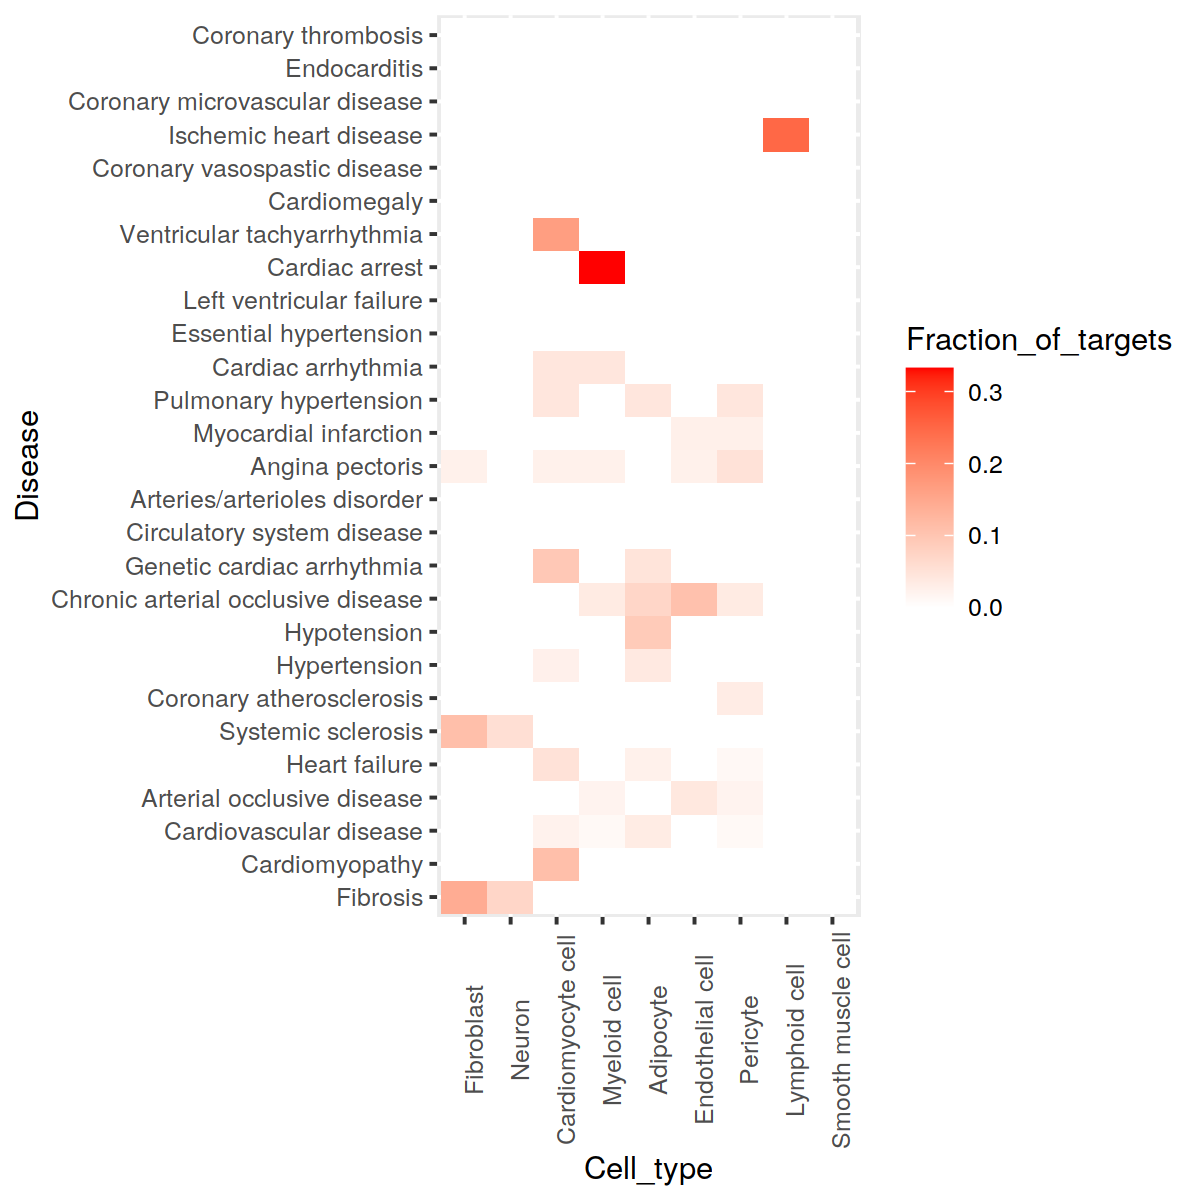

In [679]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 200)
ggplot(m ,aes(Cell_type,Disease,fill=Fraction_of_targets)) + 
    geom_tile() + 
    scale_fill_gradient(low = "white",high = "red") + 
    theme(axis.text.x = element_text(angle=90))

In [680]:
pdf("Fibrosis_case/Heatmap_cardivascular.pdf")
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 200)
ggplot(m ,aes(Cell_type,Disease,fill=Fraction_of_targets)) + 
    geom_tile() + 
    scale_fill_gradient(low = "white",high = "red") + 
    theme(axis.text.x = element_text(angle=90))
dev.off()

png 
  2

# Exploring Drugs

## 1) Methylscopolamine 

In [335]:
df_mapping_withTargert[df_mapping_withTargert$Highest_status %in% c("Patented", "Approved") & df_mapping_withTargert$Candidate_Celltype == "Cardiomyocyte cell",]

TargetID DrugID Highest_status MOA       
36997 T74500   D02FLB Approved       Blocker   
37463 T39716   D0K4CQ Approved       Blocker   
37464 T39716   D0M4YC Approved       Blocker   
37465 T39716   D0X0RI Approved       Blocker   
37466 T39716   D08MRN Approved       Blocker   
37467 T39716   D0P5GE Approved       Blocker   
37468 T39716   D07RGW Approved       Blocker   
37469 T39716   D04QLR Approved       Blocker   
37470 T39716   D04VPA Approved       Blocker   
37471 T39716   D06LYG Approved       Blocker   
37472 T39716   D05EPM Approved       Blocker   
37473 T39716   D0Q2ES Approved       Blocker   
37509 T39716   D0J5YC Approved       Blocker   
37571 T68461   D00HNB Approved       Inhibitor 
37596 T46185   D0M6VK Approved       Antagonist
37597 T46185   D05SJW Approved       Antagonist
38022 T39716   D0C7ET Approved       Blocker   
38121 T46185   D05KZK Approved       Agonist   
38283 T61657   D0G3PI Approved       Agonist   
38443 T46185   D04MWJ Approved       Inhibitor 
38451 T39716   D0N3ZJ Approved       Inhibitor 
38521 T46185   D0R7WU Approved       Inhibitor 
38531 T92057   D06XXH Approved       Antagonist
42640 T39716   D03WBS Patented       Inhibitor 
43050 T61657   D0E2AD Patented       Agonist   
43349 T61657   D0M5EC Patented       Agonist   
43356 T39716   D0M8WO Patented       Inhibitor 
43464 T39716   D0OP5F Patented       Inhibitor 
43498 T61657   D0PU1L Patented       Agonist   
43672 T39716   D0UL0K Patented       Blocker   
      TargetName                                        TargetGene DrugName
36997 Voltage-gated potassium channel Kv4.3 (KCND3)     KCND3              
37463 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37464 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37465 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37466 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37467 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37468 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37469 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37470 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37471 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37472 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37473 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37509 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
37571 Adenine nucleotide translocator 1 (SLC25A4)       SLC25A4            
37596 Muscarinic acetylcholine receptor M2 (CHRM2)      CHRM2              
37597 Muscarinic acetylcholine receptor M2 (CHRM2)      CHRM2              
38022 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
38121 Muscarinic acetylcholine receptor M2 (CHRM2)      CHRM2              
38283 Retinoic acid receptor beta (RARB)                RARB               
38443 Muscarinic acetylcholine receptor M2 (CHRM2)      CHRM2              
38451 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
38521 Muscarinic acetylcholine receptor M2 (CHRM2)      CHRM2              
38531 Erbb4 tyrosine kinase receptor (Erbb-4)           ERBB4      Vizimpro
42640 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
43050 Retinoic acid receptor beta (RARB)                RARB               
43349 Retinoic acid receptor beta (RARB)                RARB               
43356 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
43464 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
43498 Retinoic acid receptor beta (RARB)                RARB               
43672 Voltage-gated sodium channel alpha Nav1.5 (SCN5A) SCN5A              
      Candidate_Celltype
36997 Cardiomyocyte cell
37463 Cardiomyocyte cell
37464 Cardiomyocyte cell
37465 Cardiomyocyte cell
37466 Cardiomyocyte cell
37467 Cardio

In [4]:
library(Seurat)

In [3]:
dataobj <- readRDS("/data1/chenyx/HHCAd/Dataset20220412/Adult.merge.rds")

Loading required package: SeuratObject

Attaching sp



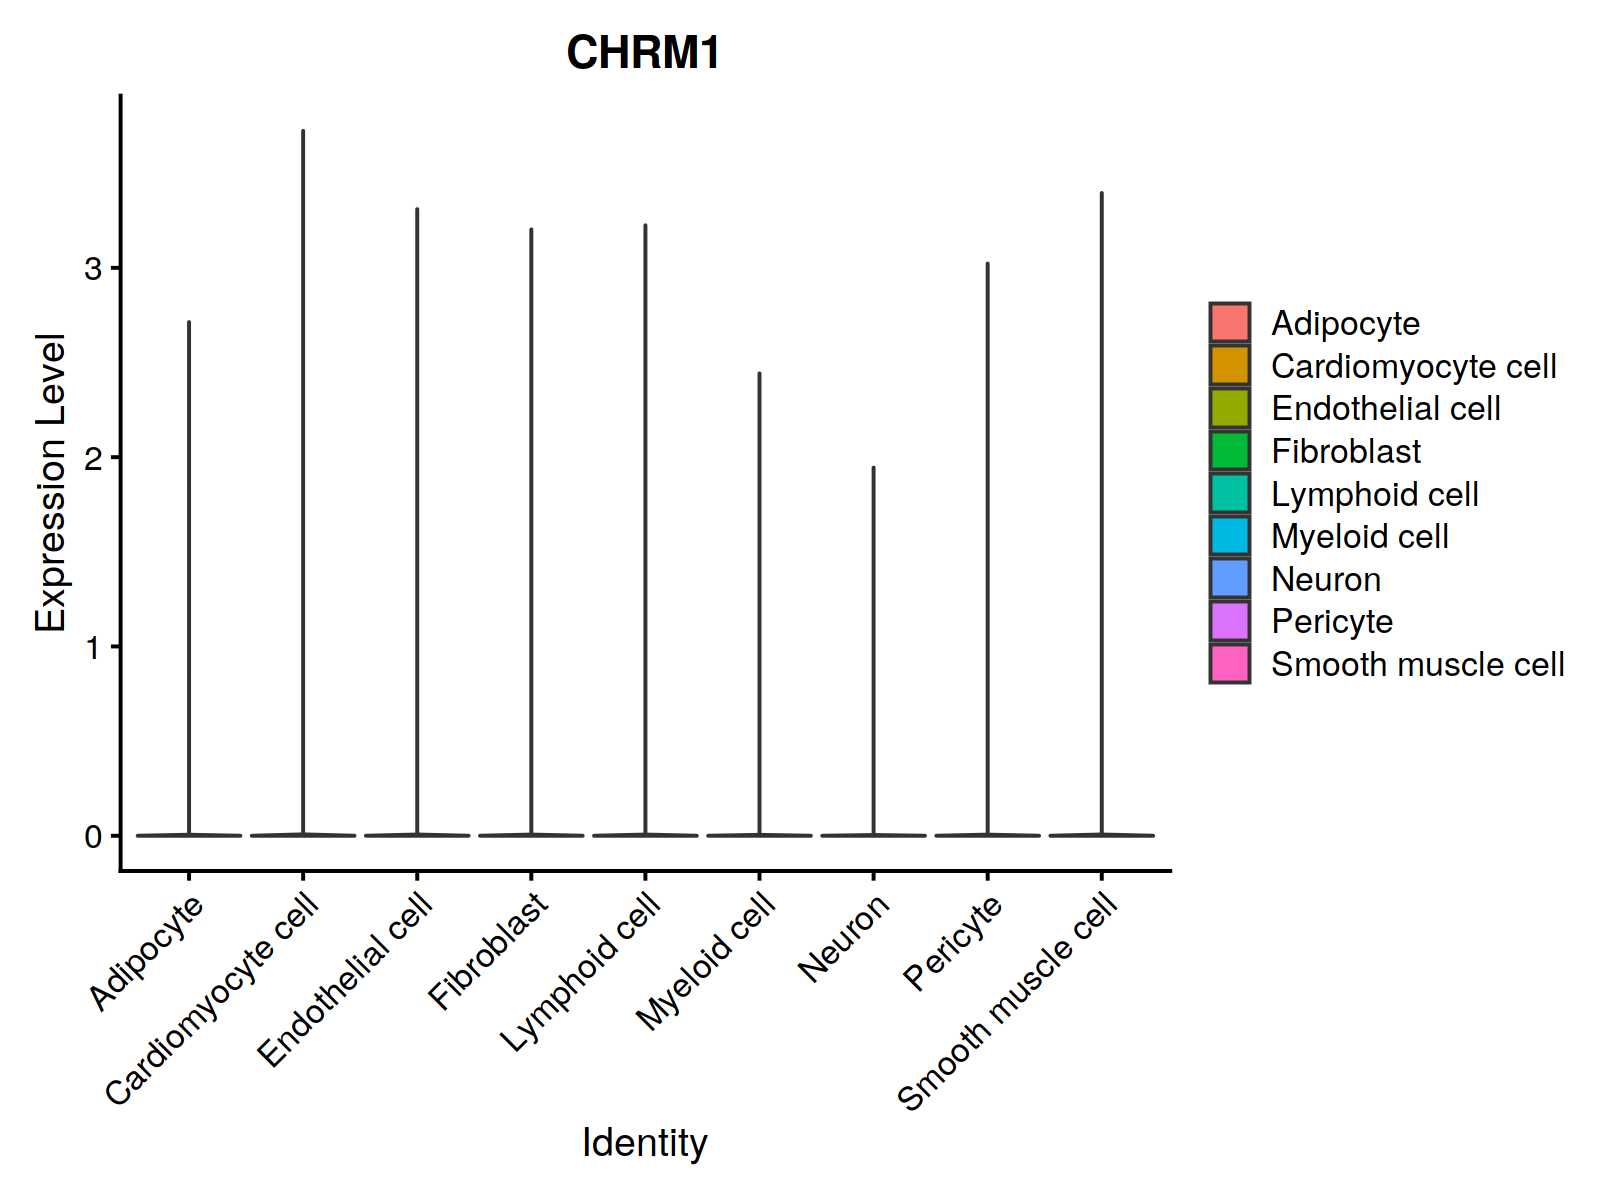

In [69]:
options(repr.plot.width=8,repr.plot.height=6)
VlnPlot(dataobj,features = "CHRM1",assay = "RNA",pt.size=0,raster=FALSE,group.by = "MCT")

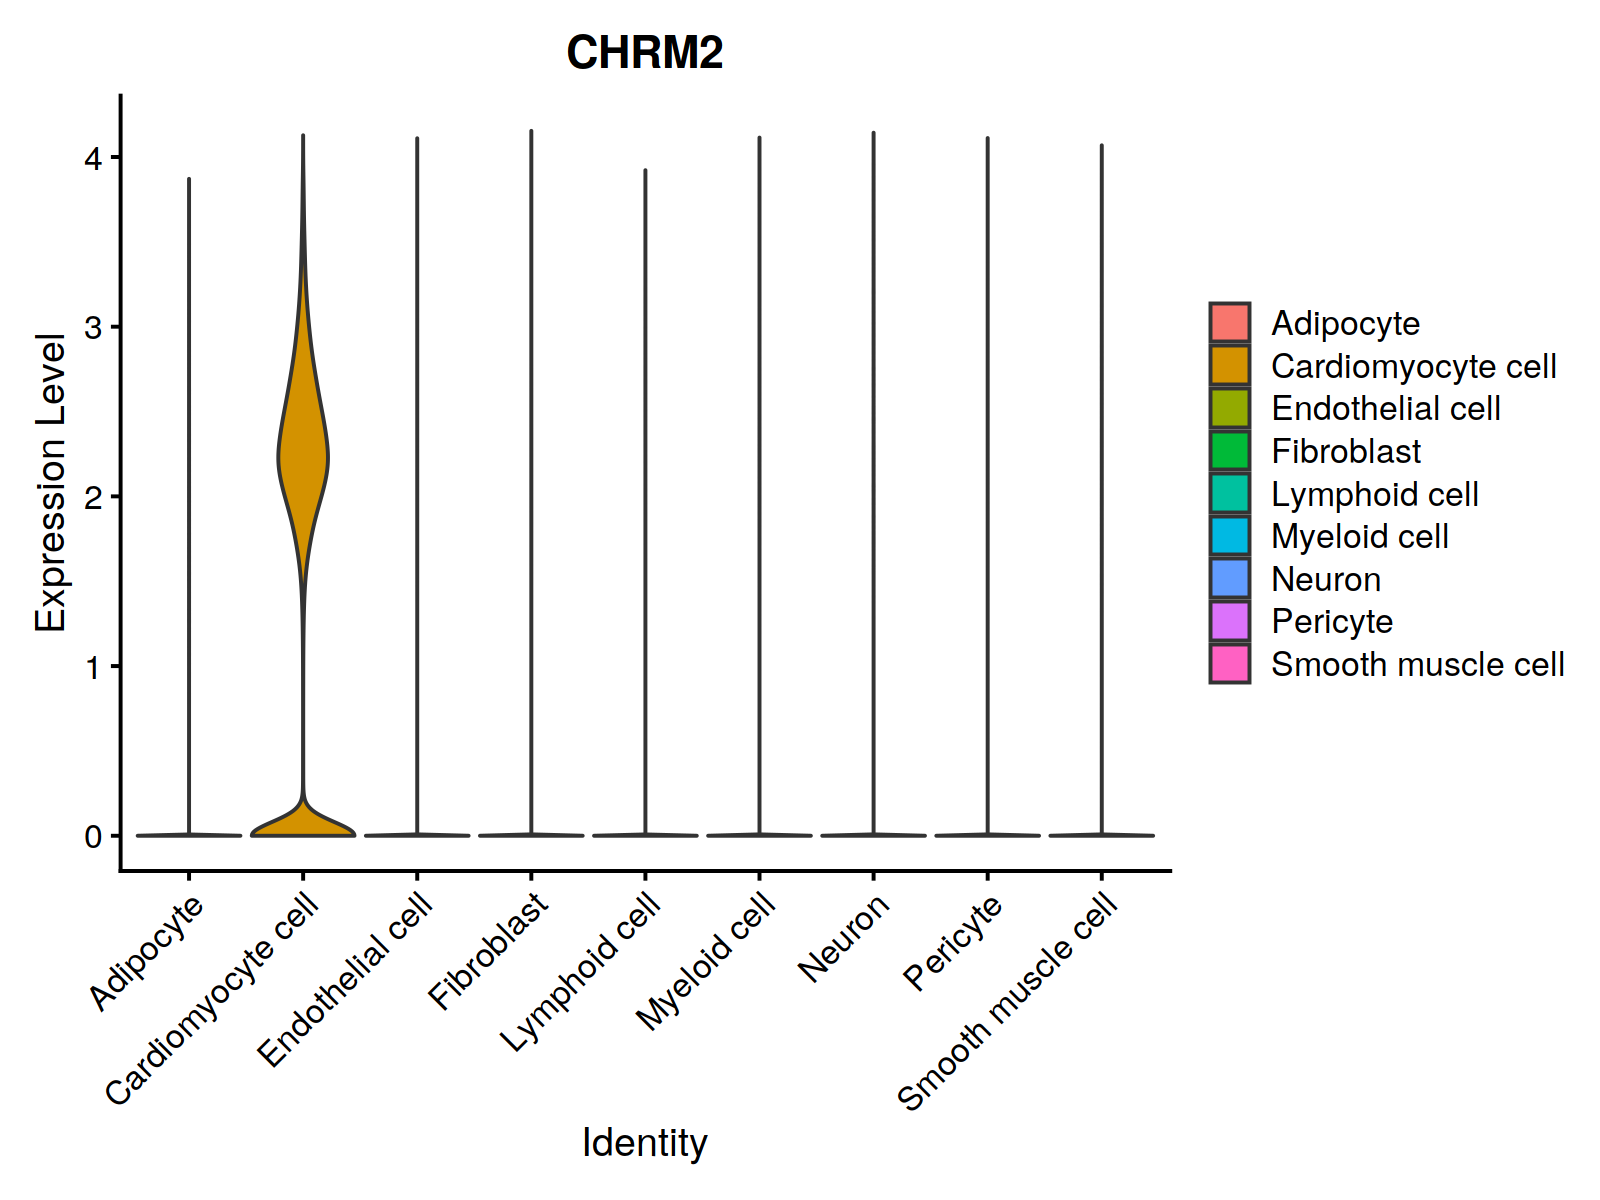

In [76]:
options(repr.plot.width=8,repr.plot.height=6)
VlnPlot(dataobj,features = "CHRM2",assay = "RNA",pt.size=0,raster=FALSE,group.by = "MCT")

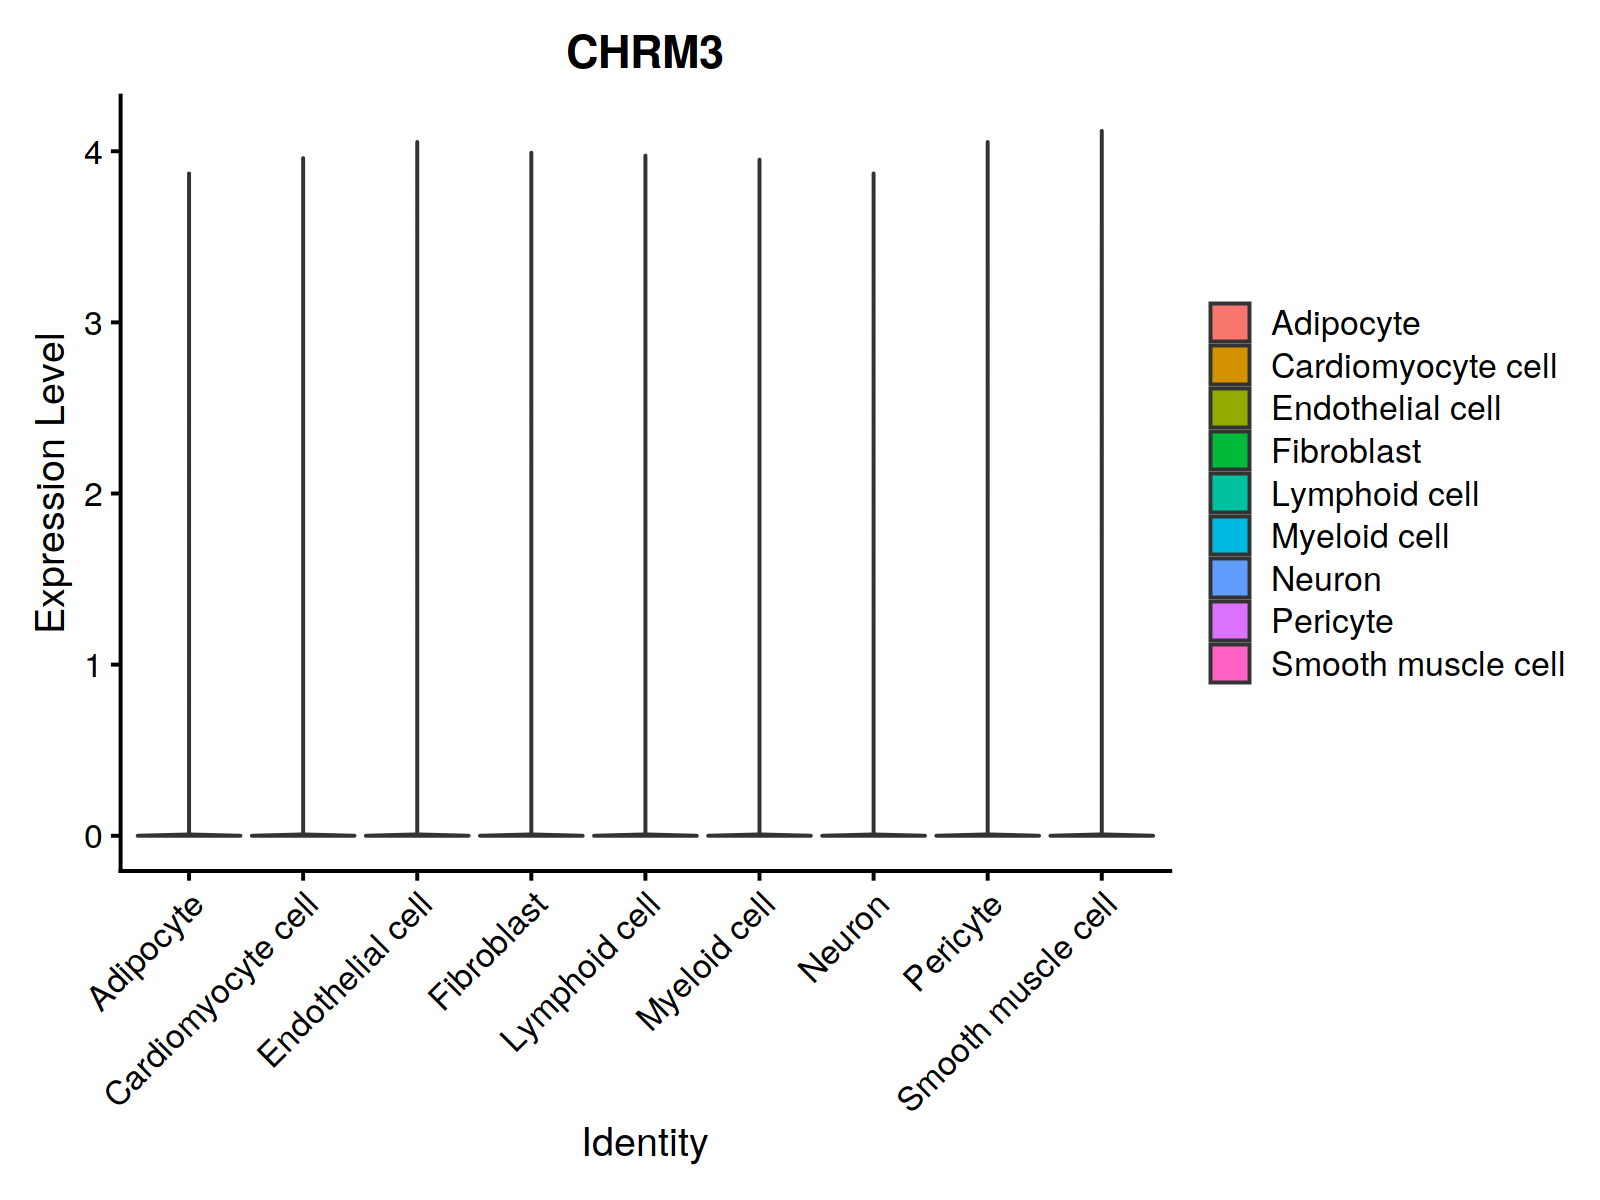

In [77]:
options(repr.plot.width=8,repr.plot.height=6)
VlnPlot(dataobj,features = "CHRM3",assay = "RNA",pt.size=0,raster=FALSE,group.by = "MCT")

In [78]:
pdf("figures/CHRM2.vlnplot.pdf",width = 8,height = 12)
options(repr.plot.width=8,repr.plot.height=12)
VlnPlot(dataobj,features = c("CHRM1","CHRM2","CHRM3"),assay = "RNA",pt.size=0,raster=FALSE,ncol = 1,,group.by = "MCT")
dev.off()

png 
  2

In [75]:
obj.CM <- subset(dataobj,MCT =="Cardiomyocyte cell")

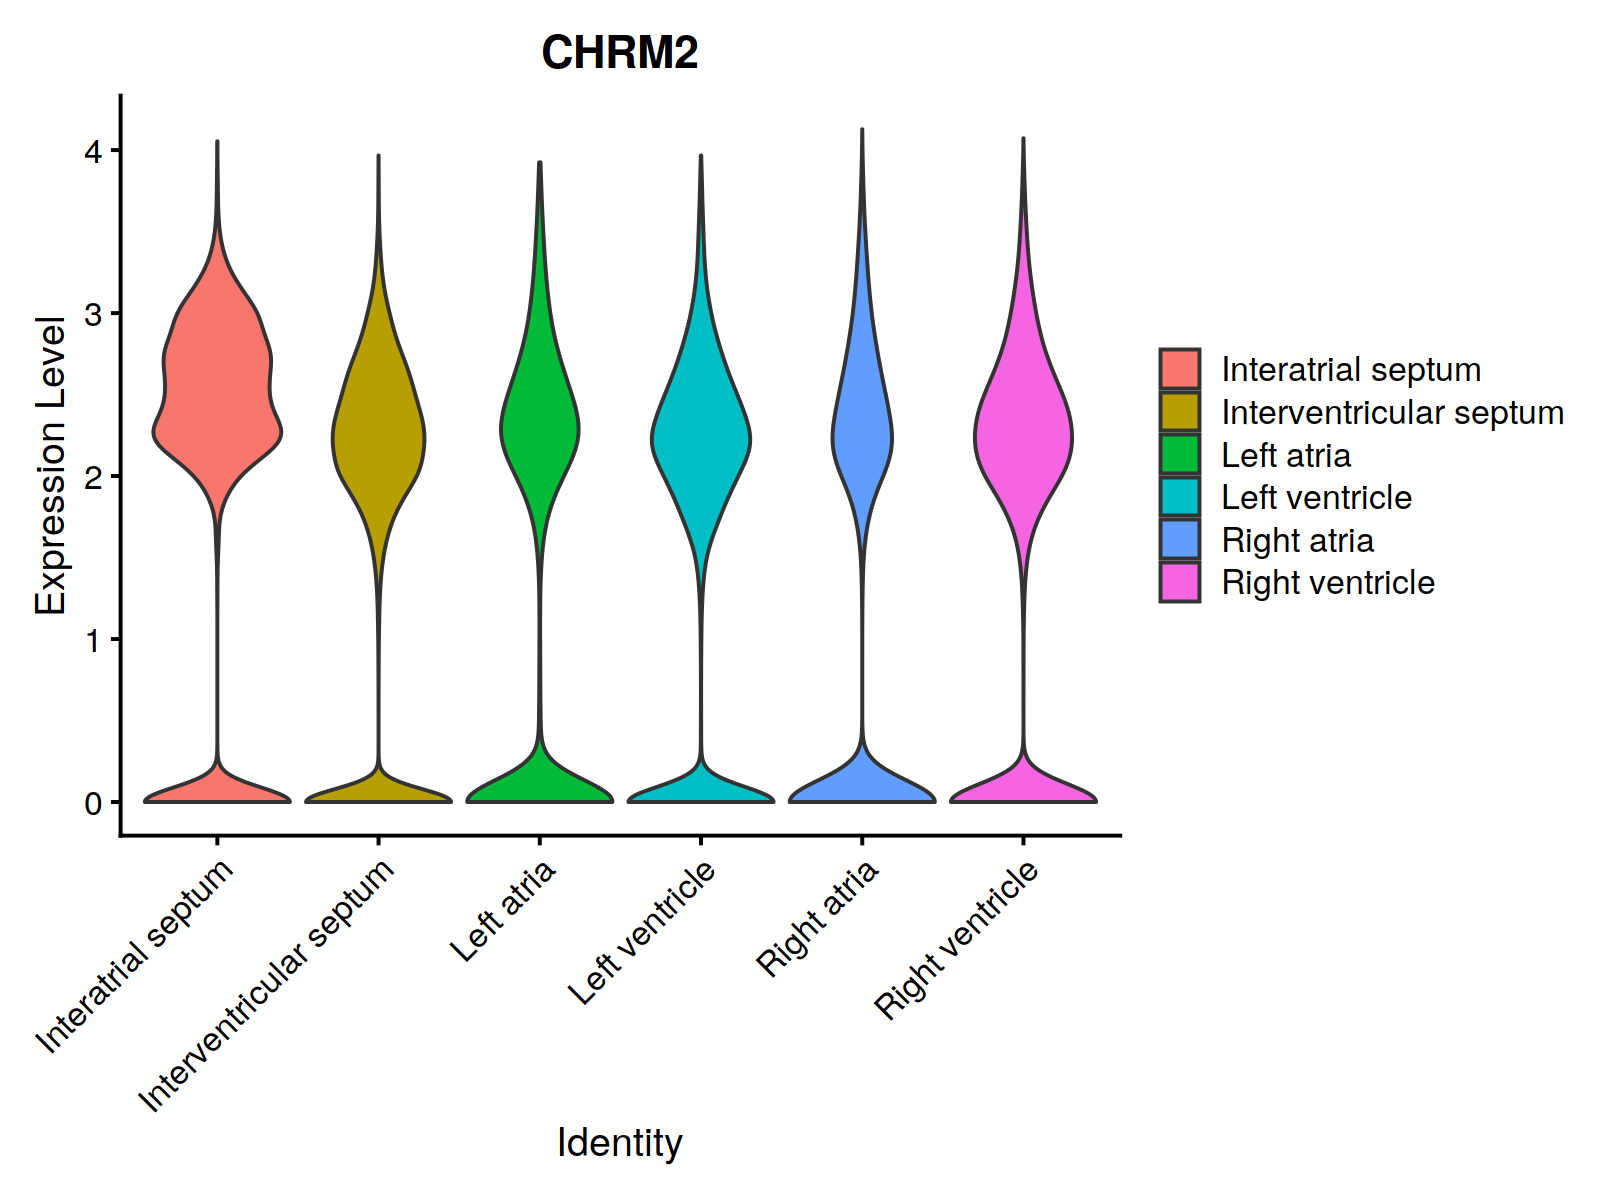

In [62]:
options(repr.plot.width=8,repr.plot.height=6)
VlnPlot(obj.CM,features = "CHRM2",group.by = "subregion", assay = "RNA",pt.size=0,raster=FALSE)

In [65]:
pdf("figures/CHRM2.anatomical.vlnplot.pdf",width = 8,height = 6)
options(repr.plot.width=8,repr.plot.height=6)
VlnPlot(obj.CM,features = "CHRM2",group.by = "subregion", assay = "RNA",pt.size=0,raster=FALSE)
dev.off()

png 
  2

In [198]:
Network_CM_LA <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/LA/Cardiomyocyte cell.1.csv",row.names = 1)
"CHRM2" %in% colnames(Network_CM_LA)

[1] TRUE

In [112]:
Network_CM_IAS <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/IAS/Cardiomyocyte cell.csv",row.names = 1)
"CHRM2" %in% colnames(Network_CM_IAS)

[1] FALSE

In [199]:
Network_CM_RA <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/RA/Cardiomyocyte cell.1.csv",row.names = 1)
"CHRM2" %in% colnames(Network_CM_RA)

[1] TRUE

In [172]:
Network_CM_RA <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/RA/Cardiomyocyte cell.2.csv",row.names = 1)
"CHRM2" %in% colnames(Network_CM_RA)

[1] FALSE

In [170]:
Network_CM_IVS <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/IVS//Cardiomyocyte cell.csv",row.names = 1)
"CHRM2" %in% colnames(Network_CM_IVS)

[1] FALSE

In [200]:
Network_CM_LV <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/LV//Cardiomyocyte cell.csv",row.names = 1)
"CHRM2" %in% colnames(Network_CM_LV)

[1] TRUE

In [201]:
Network_CM_RV <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/RV/Cardiomyocyte cell.csv",row.names = 1)
"CHRM2" %in% colnames(Network_CM_RV)

[1] TRUE

In [203]:
library(igraph)

In [210]:
library(org.Hs.eg.db)
library(clusterProfiler)
library(dplyr)
library(ggplot2)

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:igraph’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    u

#### 1.1 LA

In [285]:
df_network <- Network_CM_LA[c("CHRM2",row.names(Network_CM_LA)[Network_CM_LA$CHRM2>=0.1]), c("CHRM2",row.names(Network_CM_LA)[Network_CM_LA$CHRM2>=0.1])]

In [286]:
network <- graph_from_adjacency_matrix(as.matrix(df_network),mode = "undirected",weighted = TRUE)
my_layout <- layout_with_dh(network)
my_layout <- round(my_layout,3)
my_layout <- my_layout*10

colors <- rep('#FFFFB3',dim(my_layout)[1])
colors[rownames(df_network)=="CHRM2"] <-'#E64B35FF'
colors[rownames(df_network)%in% c('CACNA2D1','CACNB2','CAMK2D','ANK2','CTNNA3')] <-'#98FB98'
V(network)$color <- colors

In [287]:
pdf("figures/CHRM2_LACM.pdf",width = 16,height = 16)
options(repr.plot.width=16, repr.plot.height=16, repr.plot.res = 200)
p <- plot(network,layout=my_layout,vertex.label.cex=.7)
dev.off()

png 
  2

In [288]:
colnames(df_network)

[1] "CHRM2"    "AKAP6"    "ANK2"     "ANK3"     "AOPEP"    "ARHGAP24"
 [7] "AUTS2"    "CACNA2D1" "CACNB2"   "CAMK2D"   "CCSER1"   "CDH13"   
[13] "CDH2"     "CNKSR3"   "CTNNA3"   "CUX1"     "DAPK2"    "DTNA"    
[19] "ERBB4"    "ERC1"     "EXOC6B"   "FHIT"     "IGF1R"    "INSR"    
[25] "KANK1"    "LARGE1"   "LRRFIP2"  "LTBP1"    "MACF1"    "MAGI2"   
[31] "MAST4"    "MPP2"     "MYO18B"   "MYPN"     "NTN1"     "OBSCN"   
[37] "PARD3"    "PDE7A"    "PDZD2"    "PGM5"     "PLEKHA5"  "PRKN"    
[43] "PSD3"     "PTPRM"    "PXDNL"    "RBFOX1"   "RBM20"    "RBPMS"   
[49] "RCAN2"    "RERE"     "SAMD4A"   "SGCD"     "SH3D19"   "SOX6"    
[55] "SRL"      "TANC1"    "TBX5"     "THSD4"    "TNRC6B"   "TPM3"

In [289]:
aging_all_BP = enrichGO(colnames(df_network),
  OrgDb= org.Hs.eg.db,
  keyType = "SYMBOL",
  ont = "BP",
  pvalueCutoff = 0.05)

In [290]:
aging_all_BP[]

ID        
GO:0051146 GO:0051146
GO:0042692 GO:0042692
GO:0070252 GO:0070252
GO:0086003 GO:0086003
GO:0086001 GO:0086001
GO:0086091 GO:0086091
GO:0001508 GO:0001508
GO:0030048 GO:0030048
GO:0086012 GO:0086012
GO:0086065 GO:0086065
GO:0098900 GO:0098900
GO:0032414 GO:0032414
GO:0006941 GO:0006941
GO:0032411 GO:0032411
GO:0055001 GO:0055001
GO:0003012 GO:0003012
GO:0006936 GO:0006936
GO:0048639 GO:0048639
GO:2001259 GO:2001259
GO:0098901 GO:0098901
GO:0034764 GO:0034764
GO:0060048 GO:0060048
GO:0086010 GO:0086010
GO:1904064 GO:1904064
GO:1901021 GO:1901021
GO:0050808 GO:0050808
GO:1901019 GO:1901019
GO:0042391 GO:0042391
GO:0051899 GO:0051899
GO:0034767 GO:0034767
⋮          ⋮         
GO:0099623 GO:0099623
GO:0006892 GO:0006892
GO:0046928 GO:0046928
GO:0043266 GO:0043266
GO:0055017 GO:0055017
GO:0051651 GO:0051651
GO:0030336 GO:0030336
GO:0099003 GO:0099003
GO:0010765 GO:0010765
GO:0070050 GO:0070050
GO:0051480 GO:0051480
GO:0070884 GO:0070884
GO:0003279 GO:0003279
GO:0060419 GO:0060419
GO:2000146 GO:2000146
GO:0000289 GO:0000289
GO:0003230 GO:0003230
GO:0097484 GO:0097484
GO:0106056 GO:0106056
GO:1901385 GO:1901385
GO:0046620 GO:0046620
GO:0043243 GO:0043243
GO:0097242 GO:0097242
GO:0051209 GO:0051209
GO:0051283 GO:0051283
GO:0048193 GO:0048193
GO:0060045 GO:0060045
GO:0086005 GO:0086005
GO:0051588 GO:0051588
GO:0051282 GO:0051282
           Description                                                          
GO:0051146 striated muscle cell differentiation                                 
GO:0042692 muscle cell differentiation                                          
GO:0070252 actin-mediated cell contraction                                      
GO:0086003 cardiac muscle cell contraction                                      
GO:0086001 cardiac muscle cell action potential                                 
GO:0086091 regulation of heart rate by cardiac conduction                       
GO:0001508 action potential                                                     
GO:0030048 actin filament-based movement                                        
GO:0086012 membrane depolarization during cardiac muscle cell action potential  
GO:0086065 cell communication involved in cardiac conduction                    
GO:0098900 regulation of action potential                                       
GO:0032414 positive regulation of ion transmembrane transporter activity        
GO:0006941 striated muscle contraction                                          
GO:0032411 positive regulation of transporter activity                          
GO:0055001 muscle cell development                                              
GO:0003012 muscle system process                                                
GO:0006936 muscle contraction                                                   
GO:0048639 positive regulation of developmental growth                          
GO:2001259 positive regulation of cation channel activity                       
GO:0098901 regulation of cardiac muscle cell action potential                   
GO:0034764 positive regulation of transmembrane transport                       
GO:0060048 cardiac muscle contraction                                           
GO:0086010 membrane depolarization during action potential                      
GO:1904064 positive regulation of cation transmembrane transport                
GO:1901021 positive regulation of calcium ion transmembrane transporter activity
GO:0050808 synapse organization                                                 
GO:1901019 regulation of calcium ion transmembrane transporter activity         
GO:0042391 regulation of membrane potential                                     
GO:0051899 membrane depolarization                                              
GO:0034767 positive regulation of ion transmembrane transport                   
⋮          ⋮                                                                    
GO:0099623 regulation of cardiac muscle cell membrane r

In [292]:
df_result <- aging_all_BP[][,c("Description","p.adjust")]
df_result$log_p_values <- 0
for(i in 1:dim(df_result)[1]){
    df_result$log_p_values[i] <- -log10(df_result$p.adjust[i])
}
sorted_indices <- order(df_result$log_p_values)
df_result <- df_result[sorted_indices,]
# top 10
df_result <- df_result[(dim(df_result)[1]-9):dim(df_result)[1],]
pdf("figures/CHRM2_network_enrichment.pdf",width = 10,height = 5)
options(repr.plot.width=20, repr.plot.height=5, repr.plot.res = 200)
barplot(df_result$log_p_values, names.arg = df_result$Description, horiz = TRUE, xlab = "-log(p-value)", ylab = "EnrichGO Terms", las=2)
dev.off()

png 
  2

In [293]:
df_result

Description                                                  
GO:0098900 regulation of action potential                               
GO:0032414 positive regulation of ion transmembrane transporter activity
GO:0030048 actin filament-based movement                                
GO:0001508 action potential                                             
GO:0070252 actin-mediated cell contraction                              
GO:0086003 cardiac muscle cell contraction                              
GO:0086001 cardiac muscle cell action potential                         
GO:0086091 regulation of heart rate by cardiac conduction               
GO:0051146 striated muscle cell differentiation                         
GO:0042692 muscle cell differentiation                                  
           p.adjust     log_p_values
GO:0098900 1.255544e-04 3.901168    
GO:0032414 1.255544e-04 3.901168    
GO:0030048 9.399444e-05 4.026898    
GO:0001508 5.326966e-05 4.273520    
GO:0070252 3.473515e-05 4.459231    
GO:0086003 3.473515e-05 4.459231    
GO:0086001 3.473515e-05 4.459231    
GO:0086091 3.473515e-05 4.459231    
GO:0051146 2.296934e-05 4.638851    
GO:0042692 2.296934e-05 4.638851

#### 1.2 RA

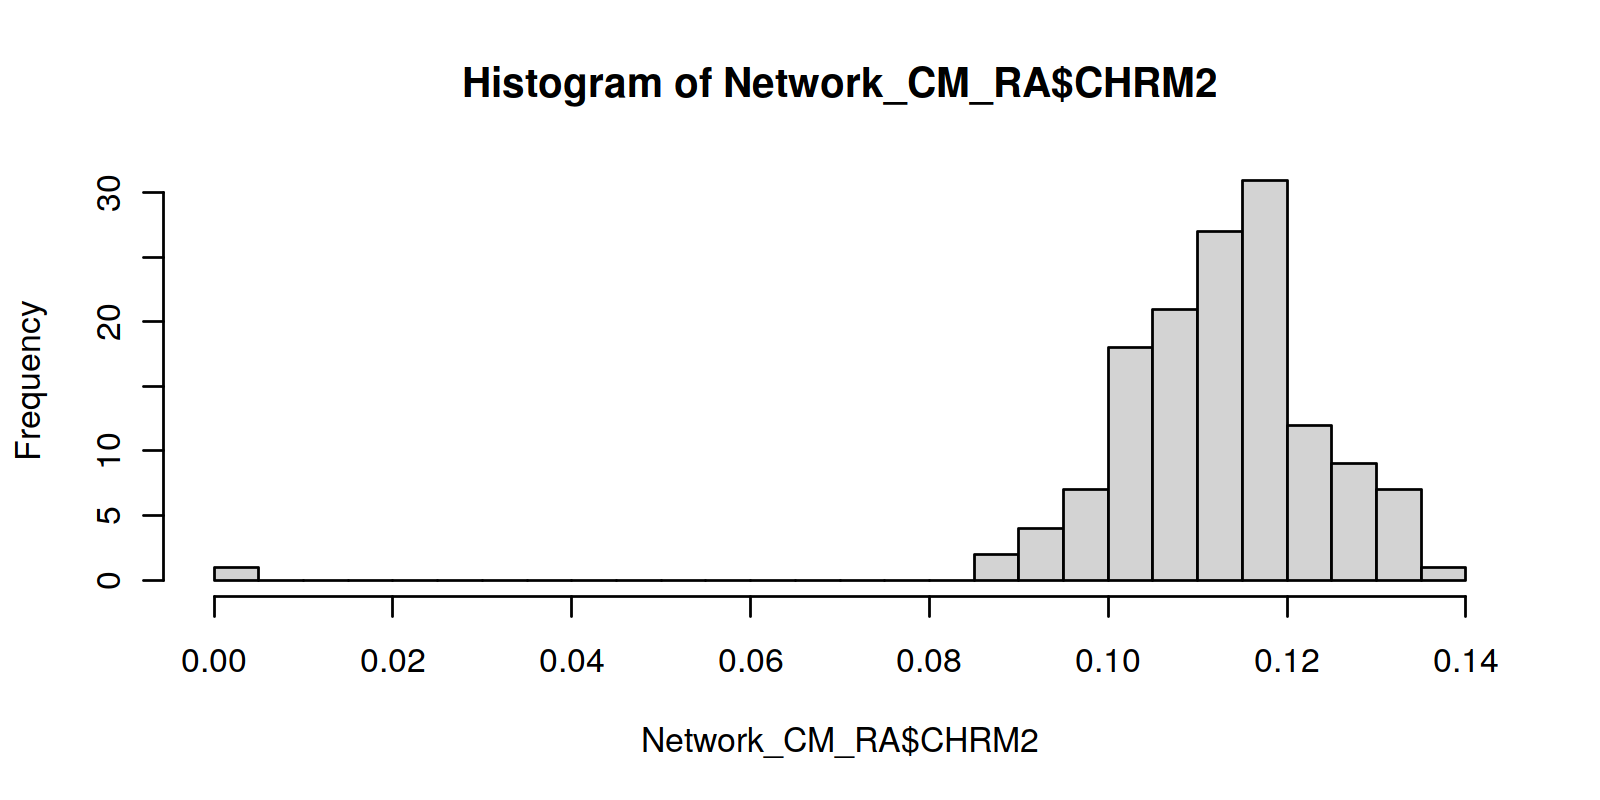

In [294]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 200)
hist(Network_CM_RA$CHRM2,breaks = 30)

In [295]:
df_network <- Network_CM_RA[c("CHRM2",row.names(Network_CM_RA)[Network_CM_RA$CHRM2>=0.1]), c("CHRM2",colnames(Network_CM_RA)[Network_CM_RA$CHRM2>=0.1])]

In [296]:
network <- graph_from_adjacency_matrix(as.matrix(df_network),mode = "undirected",weighted = TRUE)
my_layout <- layout_with_dh(network)
my_layout <- round(my_layout,3)
my_layout <- my_layout*10

colors <- rep('#FFFFB3',dim(my_layout)[1])
colors[rownames(df_network)=="CHRM2"] <-'#E64B35FF'
#colors[rownames(df_network)%in% c('CACNA2D1','CACNB2','CAMK2D','ANK2','CTNNA3')] <-'#98FB98'
V(network)$color <- colors

In [297]:
pdf("figures/CHRM2_RACM.pdf",width = 16,height = 16)
options(repr.plot.width=16, repr.plot.height=16, repr.plot.res = 200)
p <- plot(network,layout=my_layout,vertex.label.cex=.7)
dev.off()

png 
  2

In [298]:
colnames(df_network)

[1] "CHRM2"     "ACTN4"     "ACYP2"     "ADGRL2"    "AGBL4"     "AKAP6"    
  [7] "ALPK2"     "ANK2"      "ANK3"      "ANKRD17"   "AOPEP"     "ARHGAP24" 
 [13] "ARHGAP26"  "ARID1B"    "ASAP1"     "ASH1L"     "ASTN2"     "AUTS2"    
 [19] "BMPR1A"    "BTBD9"     "CACNA2D1"  "CADM2"     "CADPS"     "CAMK1D"   
 [25] "CASQ2"     "CBLB"      "CCSER1"    "CD36"      "CDH13"     "CERS6"    
 [31] "CFLAR"     "CPEB4"     "CUX1"      "DAPK2"     "DST"       "DTNA"     
 [37] "EFNA5"     "ERC1"      "ESRRG"     "EXOC6B"    "EYA4"      "FHIT"     
 [43] "FNDC3B"    "FOXP1"     "GOLGA4"    "GPATCH8"   "GREB1L"    "HIF3A"    
 [49] "IGF1R"     "IL1RAPL1"  "INSR"      "JMJD1C"    "KANK1"     "KIAA1217" 
 [55] "L3MBTL4"   "LINC.PINT" "LMO7"      "LRMDA"     "LRP12"     "LRRFIP1"  
 [61] "LRRFIP2"   "MACF1"     "MAGI2"     "MAST4"     "MBNL1"     "MEF2A"    
 [67] "MGAT5"     "MIR100HG"  "MITF"      "MKLN1"     "MPP2"      "MPP3"     
 [73] "MSI2"      "MSRB3"     "MTUS2"     "MYOM2"     "MYOZ2"     "MYPN"     
 [79] "N4BP2L2"   "NAALADL2"  "NCAM1"     "NCKAP5"    "NTN1"      "OBSCN"    
 [85] "PARD3"     "PDE1C"     "PDE7A"     "PDZD2"     "PDZRN3"    "PGM5"     
 [91] "PLCL1"     "PLCXD3"    "PLEKHA5"   "PPP1R13B"  "PRELID2"   "PRKN"     
 [97] "PSD3"      "PTPRK"     "PTPRM"     "QKI"       "RALYL"     "RASAL2"   
[103] "RBFOX1"    "RBPMS"     "RERE"      "RGS6"      "RNF115"    "SBF2"     
[109] "SH3D19"    "SIK3"      "SLC20A2"   "SLCO3A1"   "SLMAP"     "SOX6"     
[115] "SSH2"      "SYNE1"     "TACC2"     "TANC1"     "TBX5"      "TECRL"    
[121] "THSD4"     "TPM2"      "VCL"       "ZBTB16"    "ZFAND3"    "ZFPM2"    
[127] "ZNF385B"

In [299]:
aging_all_BP = enrichGO(colnames(df_network),
  OrgDb= org.Hs.eg.db,
  keyType = "SYMBOL",
  ont = "BP",
  pvalueCutoff = 0.05)

In [300]:
df_result <- aging_all_BP[][,c("Description","p.adjust")]
df_result$log_p_values <- 0
for(i in 1:dim(df_result)[1]){
    df_result$log_p_values[i] <- -log10(df_result$p.adjust[i])
}
sorted_indices <- order(df_result$log_p_values)
df_result <- df_result[sorted_indices,]
# top 10
df_result <- df_result[(dim(df_result)[1]-9):dim(df_result)[1],]
pdf("figures/CHRM2_RACM_enrichment.pdf",width = 10,height = 5)
options(repr.plot.width=20, repr.plot.height=5, repr.plot.res = 200)
barplot(df_result$log_p_values, names.arg = df_result$Description, horiz = TRUE, xlab = "-log(p-value)", ylab = "EnrichGO Terms", las=2)
dev.off()

png 
  2

In [301]:
df_result

Description                                                        
GO:0086012 membrane depolarization during cardiac muscle cell action potential
GO:0045927 positive regulation of growth                                      
GO:0003012 muscle system process                                              
GO:0055002 striated muscle cell development                                   
GO:0010927 cellular component assembly involved in morphogenesis              
GO:0030239 myofibril assembly                                                 
GO:0055001 muscle cell development                                            
GO:0048639 positive regulation of developmental growth                        
GO:0051146 striated muscle cell differentiation                               
GO:0042692 muscle cell differentiation                                        
           p.adjust     log_p_values
GO:0086012 2.752029e-03 2.560347    
GO:0045927 2.362343e-03 2.626657    
GO:0003012 2.259862e-03 2.645918    
GO:0055002 4.043354e-04 3.393258    
GO:0010927 2.054673e-04 3.687257    
GO:0030239 1.656940e-04 3.780693    
GO:0055001 1.656940e-04 3.780693    
GO:0048639 1.656940e-04 3.780693    
GO:0051146 1.656940e-04 3.780693    
GO:0042692 7.182391e-06 5.143731

#### 1.3 LV

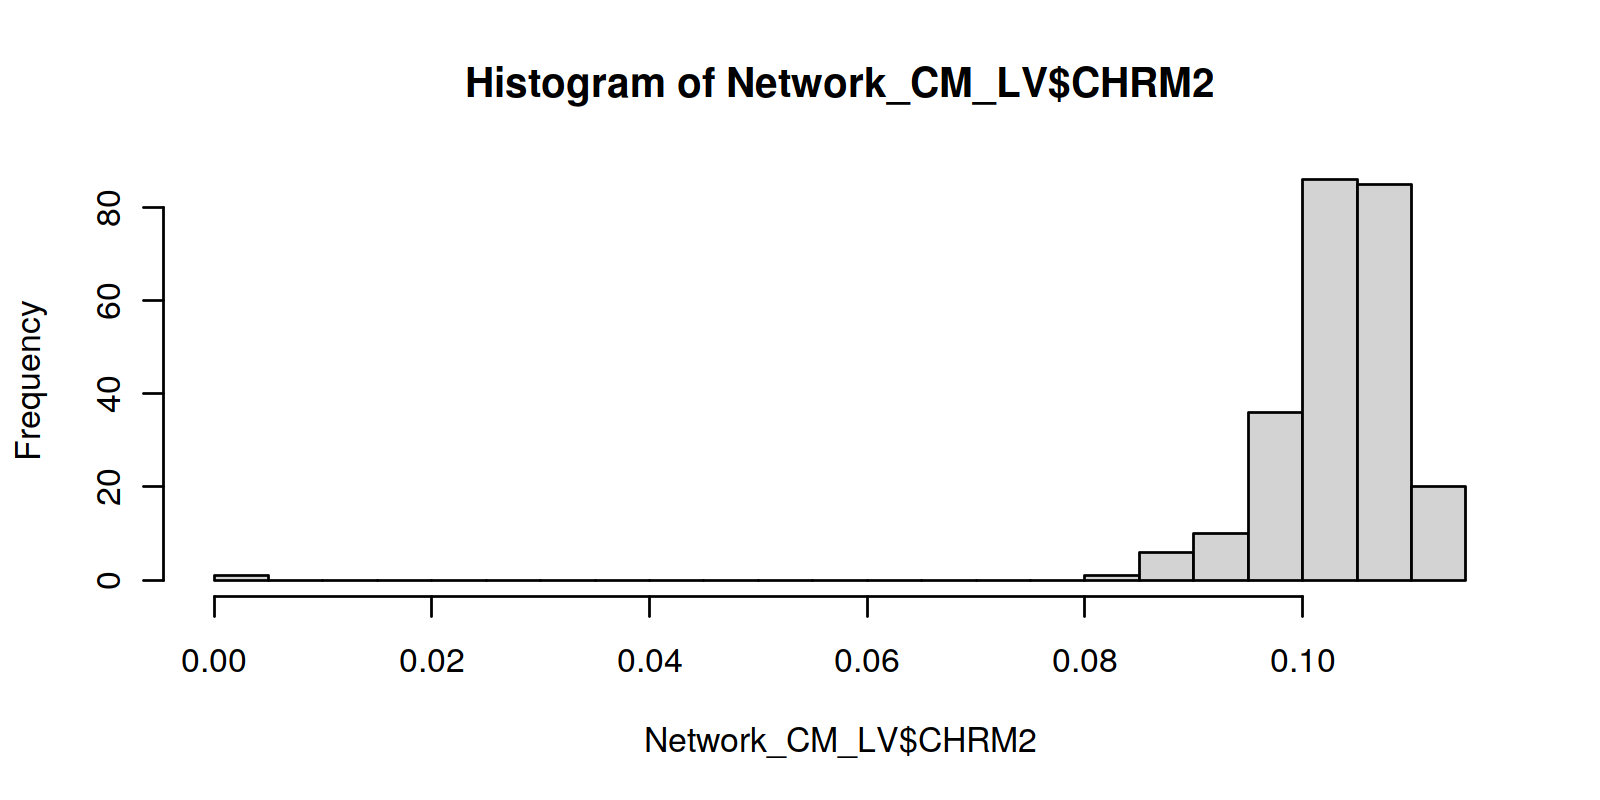

In [302]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 200)
hist(Network_CM_LV$CHRM2,breaks = 30)

In [303]:
df_network <- Network_CM_LV[c("CHRM2",row.names(Network_CM_LV)[Network_CM_LV$CHRM2>=0.1]), c("CHRM2",colnames(Network_CM_LV)[Network_CM_LV$CHRM2>=0.1])]

In [304]:
network <- graph_from_adjacency_matrix(as.matrix(df_network),mode = "undirected",weighted = TRUE)
my_layout <- layout_with_dh(network)
my_layout <- round(my_layout,3)
my_layout <- my_layout*10

colors <- rep('#FFFFB3',dim(my_layout)[1])
colors[rownames(df_network)=="CHRM2"] <-'#E64B35FF'
#colors[rownames(df_network)%in% c('CACNA2D1','CACNB2','CAMK2D','ANK2','CTNNA3')] <-'#98FB98'
V(network)$color <- colors

In [305]:
pdf("figures/CHRM2_LVCM.pdf",width = 16,height = 16)
options(repr.plot.width=16, repr.plot.height=16, repr.plot.res = 200)
p <- plot(network,layout=my_layout,vertex.label.cex=.7)
dev.off()

png 
  2

In [306]:
colnames(df_network)

[1] "CHRM2"       "ACACB"       "ACOT11"      "ACYP2"       "ADK"        
  [6] "ADPRHL1"     "AKAP9"       "ANK2"        "ANK3"        "ANKRD17"    
 [11] "AOPEP"       "ARHGAP21"    "ARHGAP24"    "ARHGAP26"    "ARID1B"     
 [16] "ASH1L"       "ATXN1"       "AUTS2"       "CALD1"       "CBLB"       
 [21] "CCDC141"     "CCSER1"      "CDIN1"       "CELF2"       "CERS6"      
 [26] "CFLAR"       "CHCHD3"      "CHN2"        "CPEB4"       "CPED1"      
 [31] "CRADD"       "CSDC2"       "DANT2"       "DAPK2"       "DGKG"       
 [36] "DGLUCY"      "DLC1"        "DPF3"        "DPY19L2"     "DTNA"       
 [41] "EFNA5"       "ERBB4"       "ERC1"        "ESRRG"       "EXOC6B"     
 [46] "FAF1"        "FBXL17"      "FBXL7"       "FHIT"        "FHOD3"      
 [51] "FKBP5"       "FNDC3B"      "FOXP1"       "FRY"         "GALNT17"    
 [56] "GBE1"        "GCNT2"       "GPHN"        "HDAC9"       "HIF3A"      
 [61] "HOMER1"      "IGF1R"       "IL1RAPL1"    "INPP4B"      "INSR"       
 [66] "JMJD1C"      "KANK1"       "KANSL1"      "KAT6B"       "KIAA1217"   
 [71] "KIF13A"      "KLHL24"      "KLHL7"       "LHFPL6"      "LIMCH1"     
 [76] "LINC.PINT"   "LMO7"        "LRP12"       "LRRFIP1"     "LRRFIP2"    
 [81] "LTBP1"       "MAGI2"       "MAP4K3"      "MARK3"       "MBD5"       
 [86] "MBNL1"       "MEF2A"       "MEIS2"       "MIR570HG"    "MIR99AHG"   
 [91] "MITF"        "MKLN1"       "MPP3"        "MSI2"        "MTUS1"      
 [96] "MTUS2"       "MYH7B"       "MYLK3"       "MYO18B"      "MYOCD"      
[101] "MYOM3"       "MYPN"        "N4BP2L2"     "NAV1"        "NCAM1"      
[106] "NCKAP5"      "NFIA"        "NFIB"        "NIBAN1"      "NLGN1"      
[111] "OBSCN"       "OGDH"        "PACRG"       "PATJ"        "PBX1"       
[116] "PCDH7"       "PCDH9"       "PDE1C"       "PDE4D"       "PDE7A"      
[121] "PDZD2"       "PDZRN3"      "PEAK1"       "PHACTR1"     "PIGU"       
[126] "PKP2"        "PLCL2"       "PLCXD3"      "PNISR"       "PPFIBP1"    
[131] "PPM1L"       "PPP1R13B"    "PPP2R3A"     "PSD3"        "PTPRK"      
[136] "PXDNL"       "R3HDM2"      "RALYL"       "RASAL2"      "RBM6"       
[141] "RBMS3"       "RBPMS"       "RERE"        "RETREG1"     "RGS6"       
[146] "RNF115"      "RNF150"      "RORA"        "SAMD4A"      "SBF2"       
[151] "SCAPER"      "SH3D19"      "SIK3"        "SLC16A1.AS1" "SLC1A3"     
[156] "SLC20A2"     "SLC7A6"      "SLMAP"       "SOX6"        "SPHKAP"     
[161] "SSH2"        "ST3GAL1"     "STARD13"     "SYNE1"       "SYNPO2"     
[166] "TACC2"       "TANC1"       "TBC1D4"      "TBC1D5"      "TENT5A"     
[171] "TMEM178B"    "TMEM65"      "TNRC6A"      "TNRC6B"      "TOM1L2"     
[176] "TRPM7"       "UBE2E2"      "UBE2H"       "UBR3"        "USP34"      
[181] "VCL"         "VPS13D"      "VWA8"        "WDPCP"       "WWOX"       
[186] "XPR1"        "ZBTB16"      "ZFAND3"      "ZFPM2"       "ZHX2"       
[191] "ZNF638"      "ZNF91"

In [307]:
aging_all_BP = enrichGO(colnames(df_network),
  OrgDb= org.Hs.eg.db,
  keyType = "SYMBOL",
  ont = "BP",
  pvalueCutoff = 0.05)

In [308]:
df_result <- aging_all_BP[][,c("Description","p.adjust")]
df_result$log_p_values <- 0
for(i in 1:dim(df_result)[1]){
    df_result$log_p_values[i] <- -log10(df_result$p.adjust[i])
}
sorted_indices <- order(df_result$log_p_values)
df_result <- df_result[sorted_indices,]
# top 10
df_result <- df_result[(dim(df_result)[1]-9):dim(df_result)[1],]
pdf("figures/CHRM2_LVCM_enrichment.pdf",width = 10,height = 5)
options(repr.plot.width=20, repr.plot.height=5, repr.plot.res = 200)
barplot(df_result$log_p_values, names.arg = df_result$Description, horiz = TRUE, xlab = "-log(p-value)", ylab = "EnrichGO Terms", las=2)
dev.off()

png 
  2

In [309]:
df_result

Description                                        p.adjust   
GO:0031032 actomyosin structure organization                  0.006156453
GO:0051146 striated muscle cell differentiation               0.006156453
GO:0051893 regulation of focal adhesion assembly              0.006156453
GO:0090109 regulation of cell-substrate junction assembly     0.006156453
GO:0055002 striated muscle cell development                   0.006156453
GO:0097062 dendritic spine maintenance                        0.006156453
GO:0150116 regulation of cell-substrate junction organization 0.006156453
GO:0030239 myofibril assembly                                 0.006156453
GO:0007044 cell-substrate junction assembly                   0.006156453
GO:0042692 muscle cell differentiation                        0.001338674
           log_p_values
GO:0031032 2.210669    
GO:0051146 2.210669    
GO:0051893 2.210669    
GO:0090109 2.210669    
GO:0055002 2.210669    
GO:0097062 2.210669    
GO:0150116 2.210669    
GO:0030239 2.210669    
GO:0007044 2.210669    
GO:0042692 2.873325

#### 1.4 RV

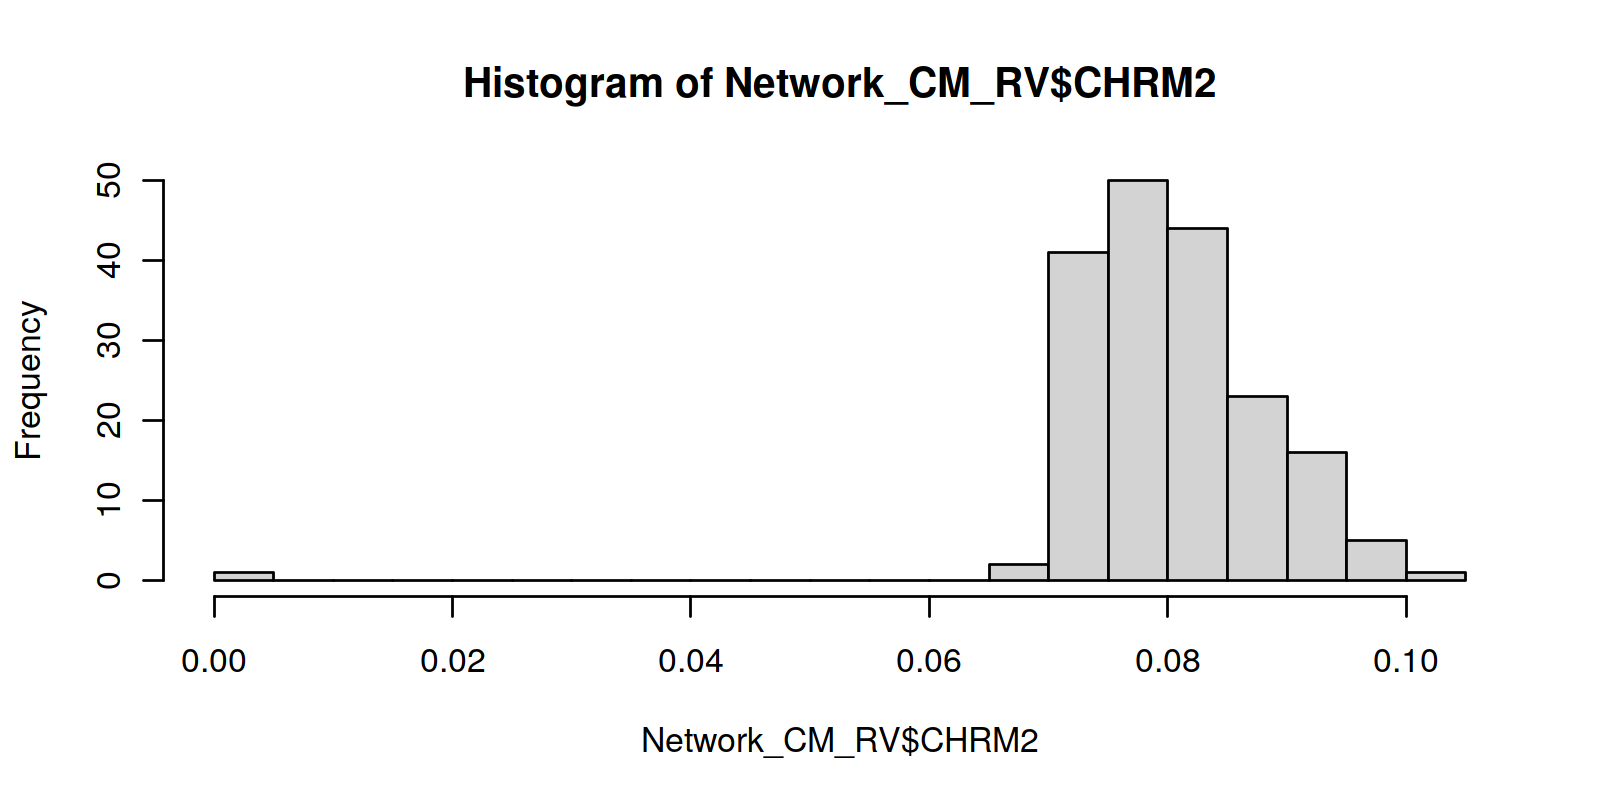

In [310]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 200)
hist(Network_CM_RV$CHRM2,breaks = 30)

In [311]:
df_network <- Network_CM_RV[c("CHRM2",row.names(Network_CM_RV)[Network_CM_RV$CHRM2>=0.08]), c("CHRM2",colnames(Network_CM_RV)[Network_CM_RV$CHRM2>=0.08])]

In [312]:
network <- graph_from_adjacency_matrix(as.matrix(df_network),mode = "undirected",weighted = TRUE)
my_layout <- layout_with_dh(network)
my_layout <- round(my_layout,3)
my_layout <- my_layout*10

colors <- rep('#FFFFB3',dim(my_layout)[1])
colors[rownames(df_network)=="CHRM2"] <-'#E64B35FF'
#colors[rownames(df_network)%in% c('CACNA2D1','CACNB2','CAMK2D','ANK2','CTNNA3')] <-'#98FB98'
V(network)$color <- colors

In [313]:
pdf("figures/CHRM2_RVCM.pdf",width = 16,height = 16)
options(repr.plot.width=16, repr.plot.height=16, repr.plot.res = 200)
p <- plot(network,layout=my_layout,vertex.label.cex=.7)
dev.off()

png 
  2

In [314]:
colnames(df_network)

[1] "CHRM2"      "AAK1"       "ACOT11"     "ACYP2"      "ADGRL2"    
 [6] "ADPRHL1"    "AKAP9"      "ANK3"       "ANKRD17"    "ARHGAP21"  
[11] "ARHGAP24"   "ARHGAP26"   "ARID1B"     "ASH1L"      "CACNA2D1"  
[16] "CACNA2D3"   "CCSER1"     "CERS6"      "CFLAR"      "CKMT2"     
[21] "COMMD10"    "CRADD"      "CSGALNACT1" "DAPK2"      "DGKG"      
[26] "DGLUCY"     "DPF3"       "DPY19L2"    "DTNA"       "EFNA5"     
[31] "ERBB4"      "ERC1"       "ESRRG"      "FAF1"       "FBXL17"    
[36] "FRY"        "GOLGA4"     "GPHN"       "JMJD1C"     "KANK1"     
[41] "KAT6B"      "KLHL24"     "LIMCH1"     "LINC.PINT"  "LMO7"      
[46] "MAGI2"      "MAP4K3"     "MARK3"      "MEF2A"      "MIR99AHG"  
[51] "MITF"       "MKLN1"      "MSI2"       "MTUS2"      "MYLK3"     
[56] "MYOM3"      "MYOZ2"      "NLGN1"      "PACRG"      "PBX1"      
[61] "PCDH9"      "PIGU"       "PLCL2"      "PPARGC1A"   "PPP2R3A"   
[66] "PTPRK"      "PXDNL"      "RASAL2"     "RERE"       "RGS6"      
[71] "RNF150"     "SBF2"       "SCAPER"     "SLC1A3"     "SOX6"      
[76] "SPHKAP"     "ST3GAL1"    "STARD13"    "TBC1D4"     "TBC1D5"    
[81] "TMEM178B"   "TNRC6A"     "TNRC6B"     "TRPM7"      "UBR3"      
[86] "VWA8"       "WDPCP"      "ZFAND3"     "ZHX2"       "ZNF638"

In [315]:
aging_all_BP = enrichGO(colnames(df_network),
  OrgDb= org.Hs.eg.db,
  keyType = "SYMBOL",
  ont = "BP",
  pvalueCutoff = 0.05)

In [317]:
df_result <- aging_all_BP[][,c("Description","p.adjust")]
df_result$log_p_values <- 0
for(i in 1:dim(df_result)[1]){
    df_result$log_p_values[i] <- -log10(df_result$p.adjust[i])
}
sorted_indices <- order(df_result$log_p_values)
df_result <- df_result[sorted_indices,]
# top 10
df_result <- df_result[(dim(df_result)[1]-9):dim(df_result)[1],]
pdf("figures/CHRM2_RVCM_enrichment.pdf",width = 10,height = 5)
options(repr.plot.width=20, repr.plot.height=5, repr.plot.res = 200)
barplot(df_result$log_p_values, names.arg = df_result$Description, horiz = TRUE, xlab = "-log(p-value)", ylab = "EnrichGO Terms", las=2)
dev.off()

png 
  2

In [318]:
df_result

Description                           p.adjust   log_p_values
GO:2000146 negative regulation of cell motility  0.03617222 1.441625    
GO:0043501 skeletal muscle adaptation            0.03617222 1.441625    
GO:0030239 myofibril assembly                    0.03617222 1.441625    
GO:0031032 actomyosin structure organization     0.03617222 1.441625    
GO:0030336 negative regulation of cell migration 0.03433864 1.464217    
GO:0031529 ruffle organization                   0.03266250 1.485951    
GO:0003012 muscle system process                 0.01568368 1.804552    
GO:0043087 regulation of GTPase activity         0.01568368 1.804552    
GO:0097178 ruffle assembly                       0.01568368 1.804552    
GO:1900027 regulation of ruffle assembly         0.01324848 1.877834

## 2) Rosiglitazone

In [7]:
pdf("figures//PPARG.vlnplot.pdf", width = 8,height = 6)
options(repr.plot.width=8,repr.plot.height=6)
VlnPlot(dataobj,features = "PPARG",group.by = "MCT", assay = "RNA",pt.size=0,raster=FALSE)
dev.off()

png 
  2

In [8]:
obj.adipocyte <- subset(dataobj,MCT =="Adipocyte")

In [9]:
pdf("figures//PPARG.Adipo_subregion.vlnplot.pdf", width = 8,height = 6)
options(repr.plot.width=8,repr.plot.height=6)
VlnPlot(obj.adipocyte, features = "PPARG", group.by = "subregion", assay = "RNA",pt.size=0,raster=FALSE)
dev.off()

png 
  2

In [1]:
AD_sub_DEGs <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Subcelltype_DEGs/Adult_result/Adipocyte.csv")
AD_sub_DEGs[AD_sub_DEGs$gene=="PPARG",]

X      p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene 
351  PPARG  2.274756e-85 0.7649807  0.883 0.839 4.081823e-81 IAS     PPARG
1815 PPARG1 6.628180e-54 0.6914800  0.654 0.885 1.189361e-49 LV      PPARG

In [2]:
Network_AD_IAS <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/IAS/Adipocyte.1.csv",row.names = 1)
"PPARG" %in% colnames(Network_AD_IAS)

[1] FALSE

In [3]:
Network_AD_IAS <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/IAS/Adipocyte.2.csv",row.names = 1)
"PPARG" %in% colnames(Network_AD_IAS)

[1] FALSE

In [4]:
Network_AD_LV <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/LV/Adipocyte.1.csv",row.names = 1)
"PPARG" %in% colnames(Network_AD_LV)

[1] FALSE

In [5]:
Network_AD_LV <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/LV/Adipocyte.2.csv",row.names = 1)
"PPARG" %in% colnames(Network_AD_LV)

[1] FALSE

In [6]:
Network_AD_LV <- read.csv("/data3/cyx/HHCAd_AnalysisResult/Coexpression_Networks/Adult_result/LV/Adipocyte.3.csv",row.names = 1)
"PPARG" %in% colnames(Network_AD_LV)

[1] TRUE

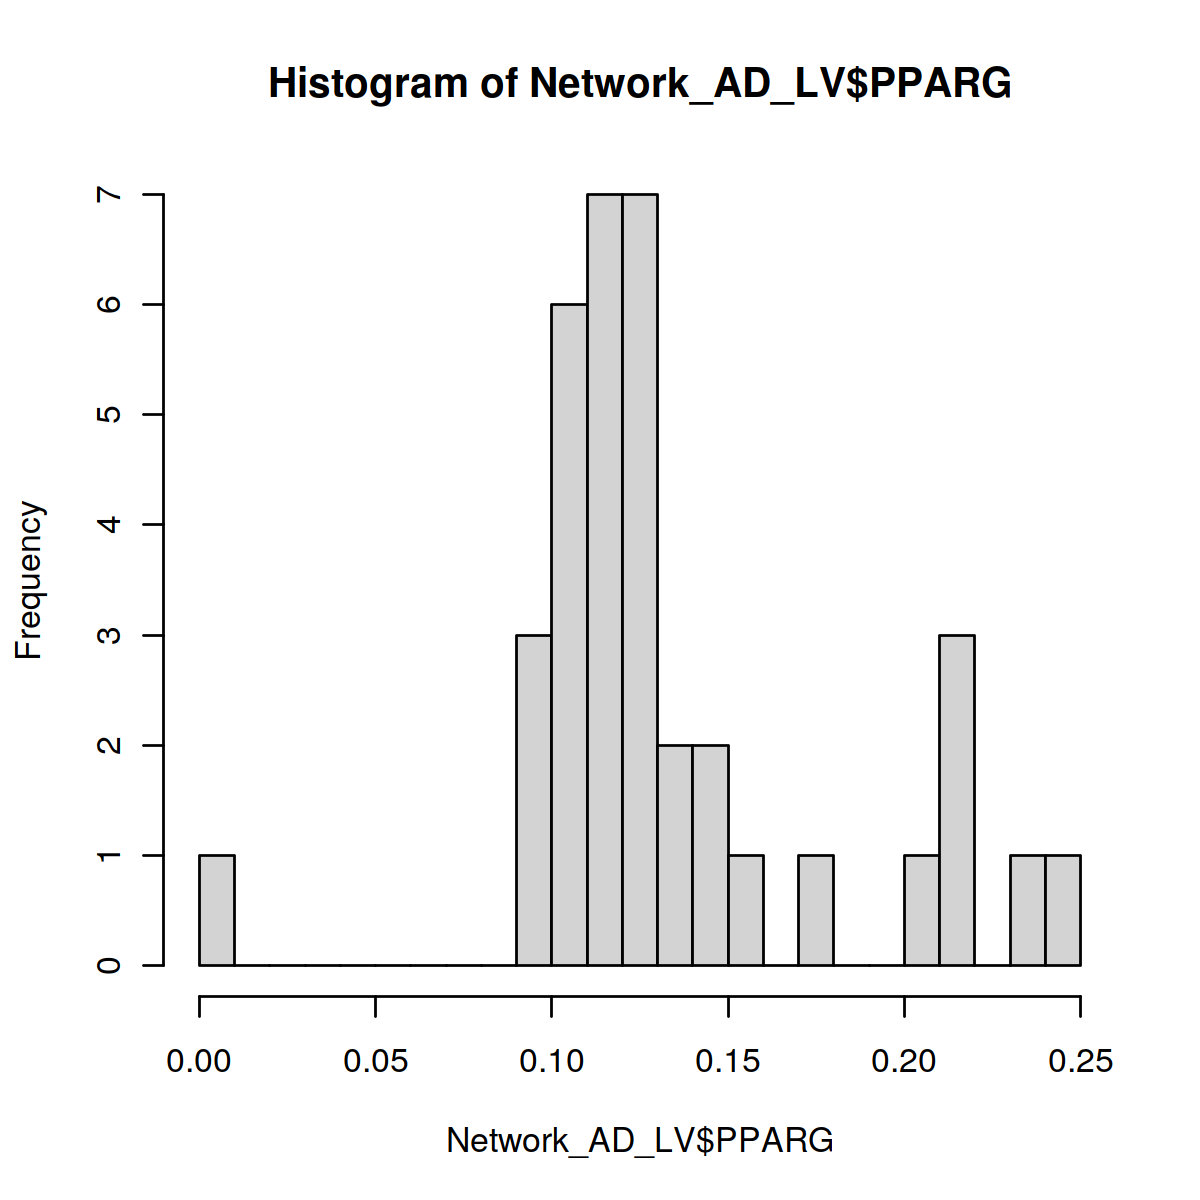

In [321]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 200)
hist(Network_AD_LV$PPARG,breaks = 30)

In [322]:
library(igraph)

In [323]:
row.names(Network_AD_LV)[Network_AD_LV$PPARG>=0.05]

[1] "ACACB"     "ADH1B"     "APBB2"     "CELF2"     "COL4A2"    "DLC1"     
 [7] "EBF1"      "FOXO1"     "FRMD4A"    "GBE1"      "GHR"       "GPAM"     
[13] "IMMP2L"    "ITPR2"     "ITSN1"     "LINC00486" "LPL"       "MALAT1"   
[19] "MAPK10"    "MBNL1"     "MGST1"     "MYCBP2"    "NEAT1"     "PDE3B"    
[25] "PLXNA4"    "PTEN"      "PTPRG"     "RBMS3"     "SIK2"      "SLC1A3"   
[31] "SORBS1"    "TMEM132C"  "UBE2E2"    "ZBTB16"    "ZBTB20"

In [324]:
df_network <- Network_AD_LV[c("PPARG",row.names(Network_AD_LV)[Network_AD_LV$PPARG>=0.1]), c("PPARG",row.names(Network_AD_LV)[Network_AD_LV$PPARG>=0.1])]

In [330]:
network <- graph_from_adjacency_matrix(as.matrix(df_network),mode = "undirected",weighted = TRUE)
my_layout <- layout_with_dh(network)
my_layout <- round(my_layout,3)
my_layout <- my_layout*10

colors <- rep('#FFFFB3',dim(my_layout)[1])
colors[rownames(df_network)=="PPARG"] <-'#E64B35FF'
#colors[rownames(df_network)%in% c('CACNA2D1','CACNB2','CAMK2D','ANK2','CTNNA3')] <-'#98FB98'
V(network)$color <- colors

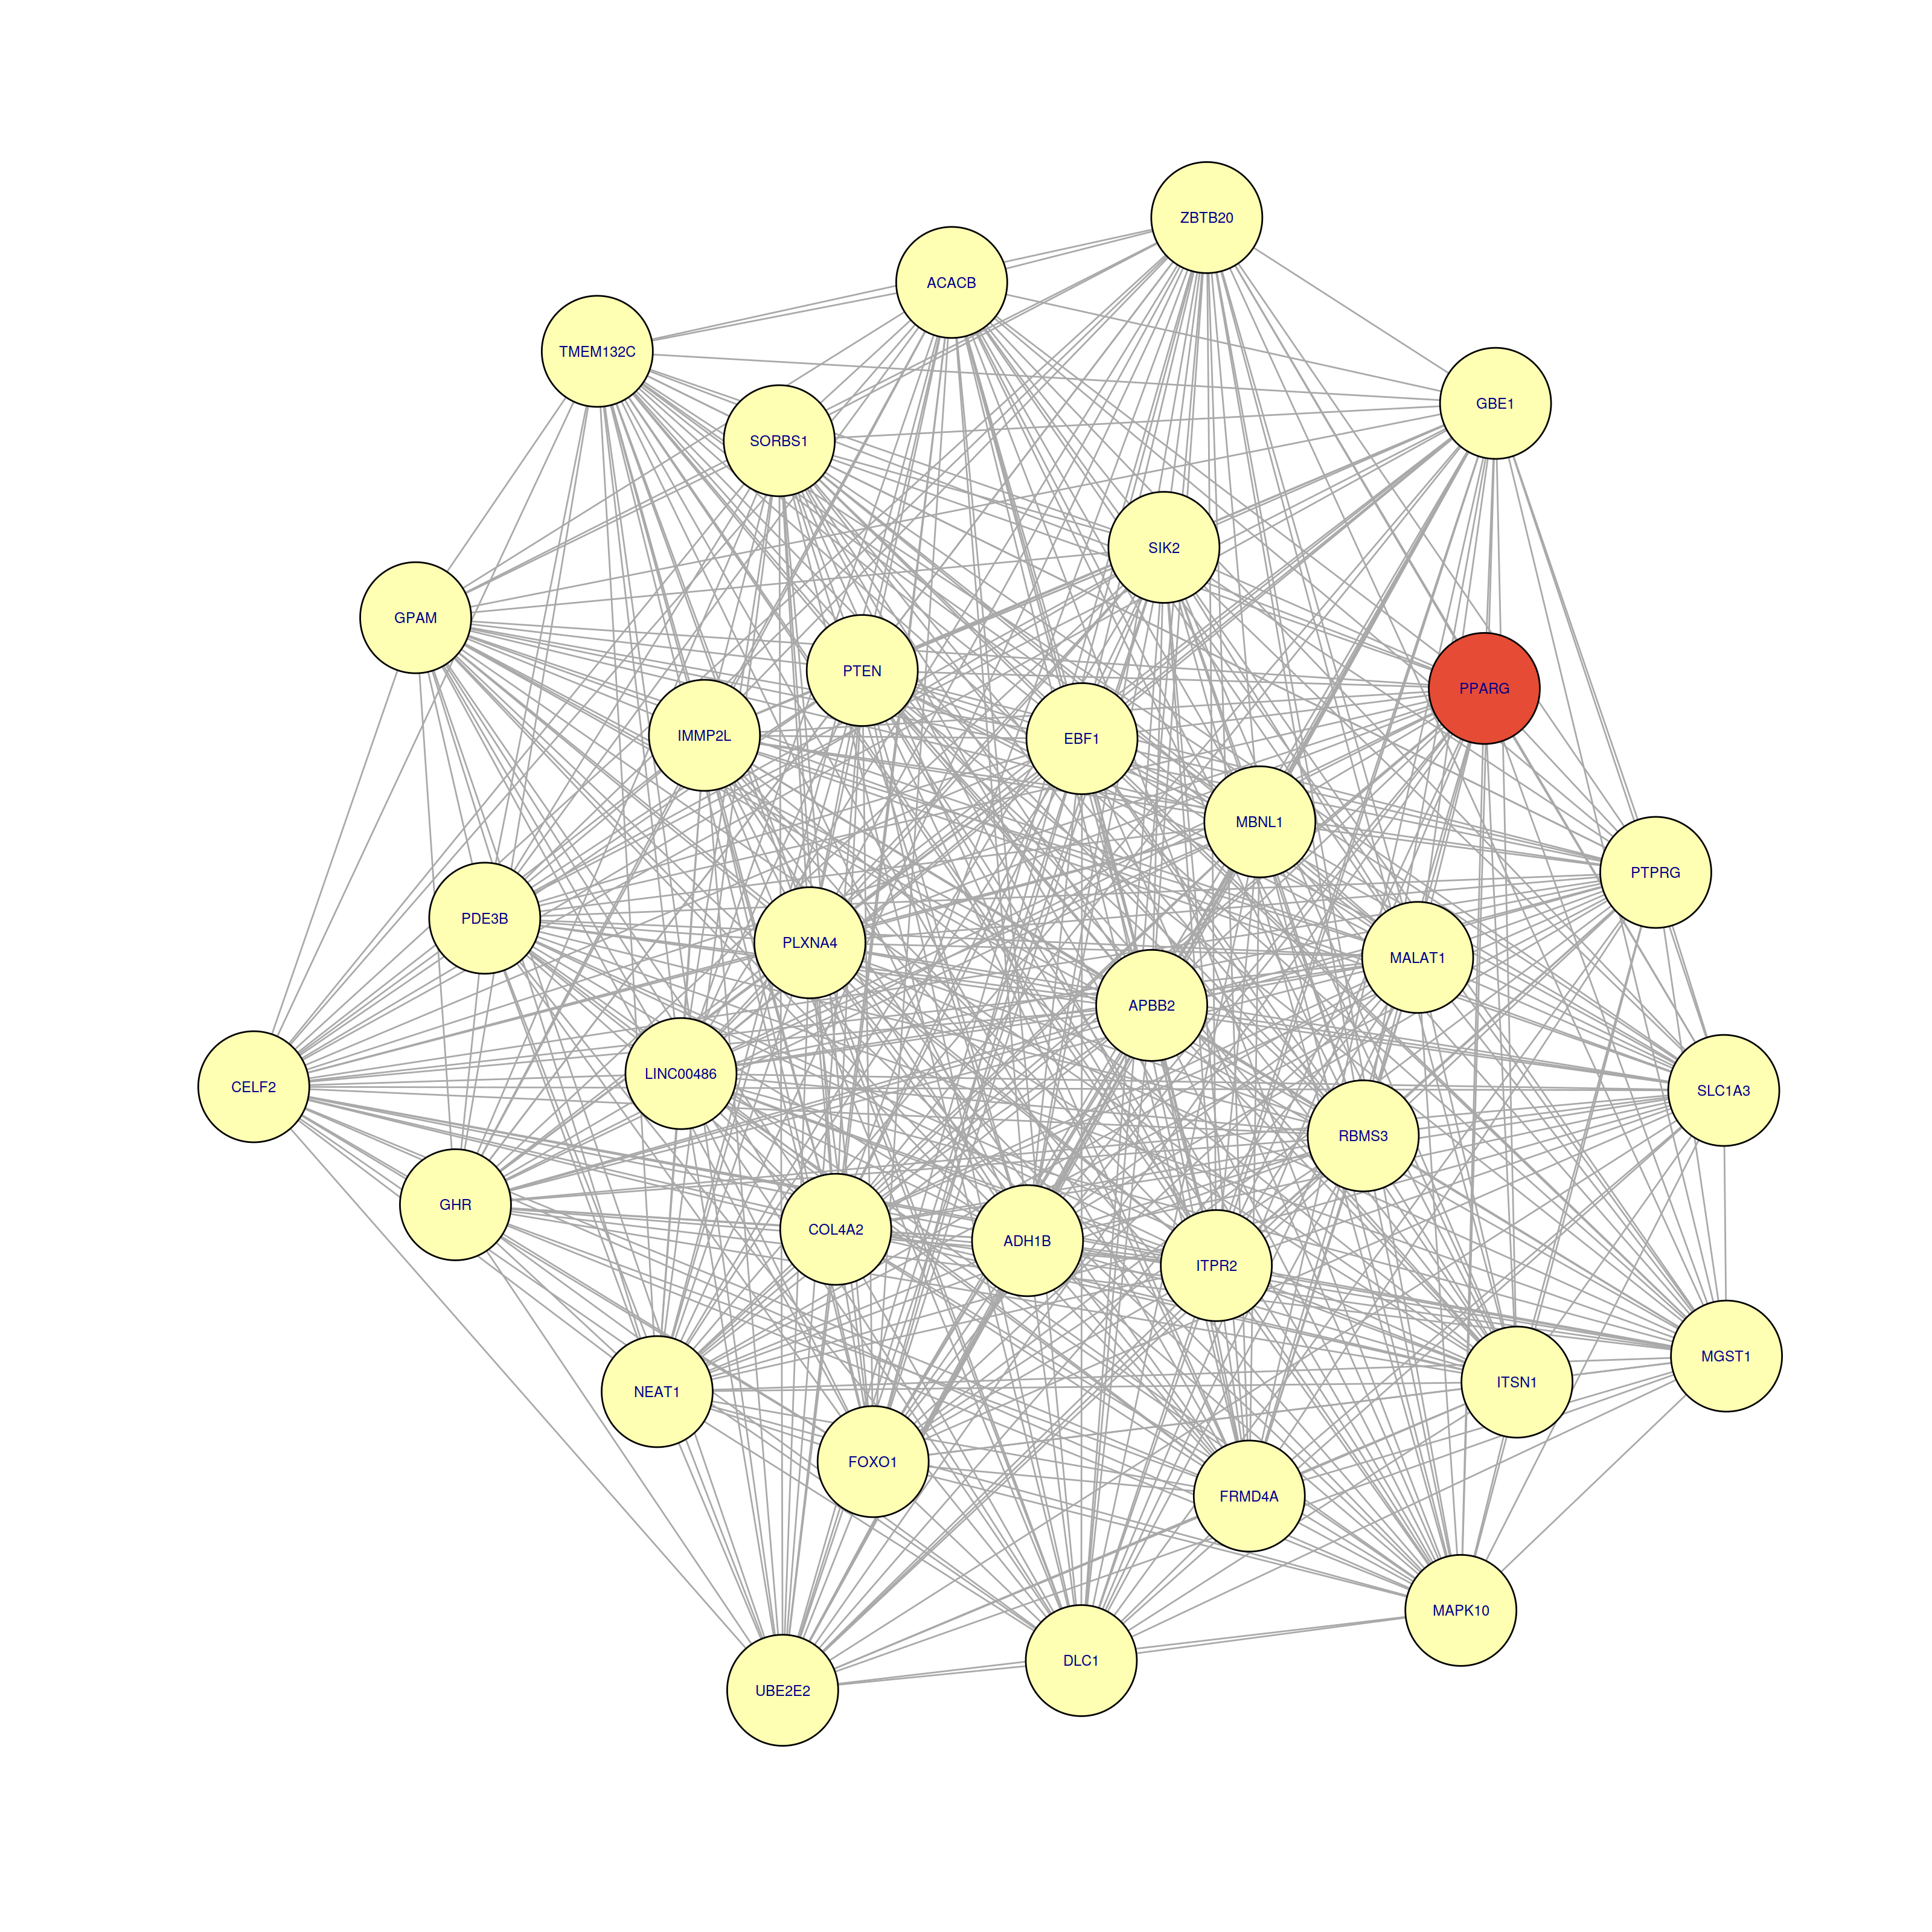

In [331]:
options(repr.plot.width=16, repr.plot.height=16, repr.plot.res = 200)
p <- plot(network,layout=my_layout,vertex.label.cex=.7)

In [7]:
cellchat <- readRDS("/data3/cyx/HHCAd_AnalysisResult/CellChat_result/Adult_result/LV.rds")

In [53]:
pdf("figures/ANGPTL.bar.pdf")
netAnalysis_contribution(cellchat, signaling = "ANGPTL")
dev.off()

png 
  2

In [55]:
pdf("figures/ANGPTL.chordplot.pdf")
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 200)
netVisual_individual(cellchat, signaling = "ANGPTL", pairLR.use =c("ANGPTL4_ITGA5_ITGB1"), layout = "circle")
dev.off()

[[1]]


png 
  2

In [56]:
pdf("figures/LEP.bar.pdf")
netAnalysis_contribution(cellchat, signaling = "LEP")
dev.off()

png 
  2

In [57]:
pdf("figures/LEP.chord.pdf")
options(repr.plot.width=12, repr.plot.height=6, repr.plot.res = 200)
netVisual_individual(cellchat, signaling = "LEP", pairLR.use =c("LEP_LEPR"), layout = "circle")
dev.off()

[[1]]


png 
  2